In [2]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [36]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

Prepare Data

In [13]:
mushroom_data = pd.read_csv('../data/mushroom.csv')
mushroom_data.head()

cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1

In [ ]:
mushroom_data.hist(bins=30, figsize=(15, 10))
plt.show()

In [14]:
cX = mushroom_data.drop(columns=['class'])
cy = mushroom_data['class']
cX_train, cX_test, cy_train, cy_test = train_test_split(cX, cy, test_size=0.2, random_state=34)

In [15]:
scaler = StandardScaler()
# scaler = scaler.fit(cX_train)
cX_train = scaler.fit_transform(cX_train)
cX_test = scaler.transform(cX_test)

In [33]:
architectures = [
    (10, 10),
    (50, 50, 50),
    (100, 50, 25),
    (50, 25),
    (100,)
]

activation_functions = ['relu', 'logistic', 'tanh', 'identity']

In [34]:
results = []
for architecture in architectures:
    for activation_function in activation_functions:
        nn = MLPClassifier(hidden_layer_sizes=architecture, activation=activation_function, max_iter=1000, random_state=34)
        nn.fit(cX_train, cy_train)
        
        predictions = nn.predict(cX_test)
        conf_matrix = cm(cy_test, predictions)
        class_report = cr(cy_test, predictions)
        
        train_sizes, train_scores, validation_scores = learning_curve(
            estimator=nn,
            X=cX_train,
            y=cy_train,
            train_sizes=np.linspace(0.1, 1.0, 10),
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        validation_mean = np.mean(validation_scores, axis=1)
        validation_std = np.std(validation_scores, axis=1)
        
        
        results.append(
            {'architecture': architecture,
             'activation_function': activation_function,
             'nn': nn,
             'confusion_matrix': conf_matrix,
             'classification_report': class_report,
             'train_mean': train_mean,
             'train_std': train_std,
             'train_sizes': train_sizes,
             'validation_mean': validation_mean,
             'validation_std': validation_std
             }
        )

/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reac

Generate results

Architecture: (10, 10), Activation: relu
Confusion Matrix:
[[4340  429]
 [ 495 5543]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4769
           1       0.93      0.92      0.92      6038

    accuracy                           0.91     10807
   macro avg       0.91      0.91      0.91     10807
weighted avg       0.91      0.91      0.91     10807


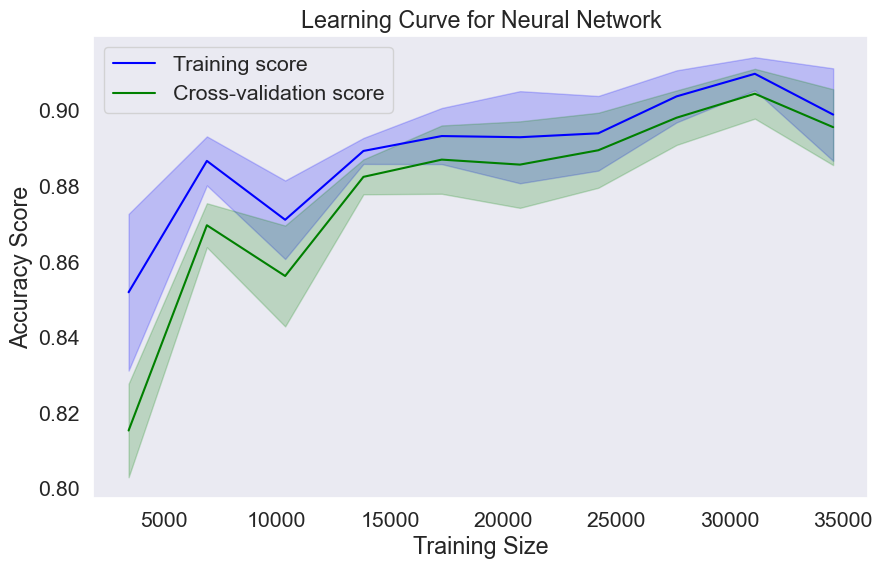

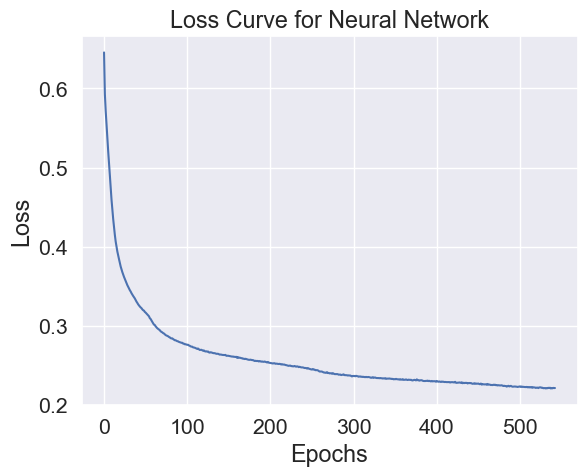

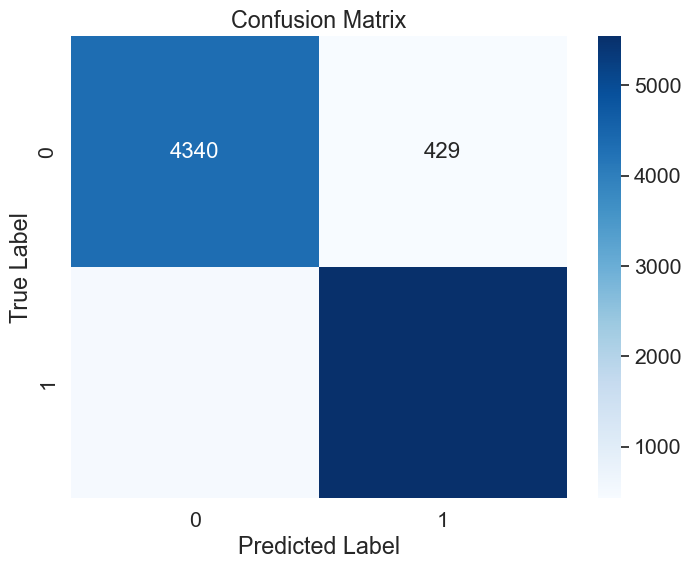

Architecture: (10, 10), Activation: logistic
Confusion Matrix:
[[4301  468]
 [ 517 5521]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      4769
           1       0.92      0.91      0.92      6038

    accuracy                           0.91     10807
   macro avg       0.91      0.91      0.91     10807
weighted avg       0.91      0.91      0.91     10807


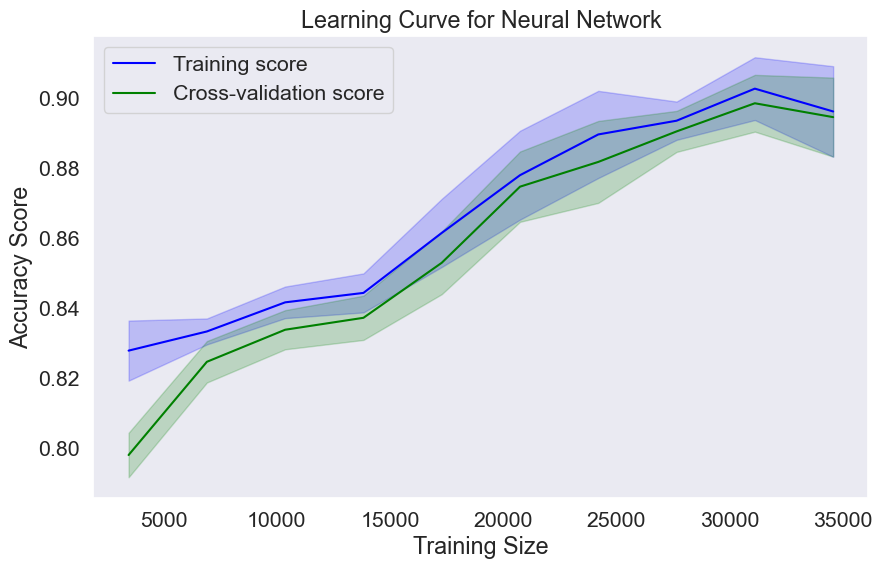

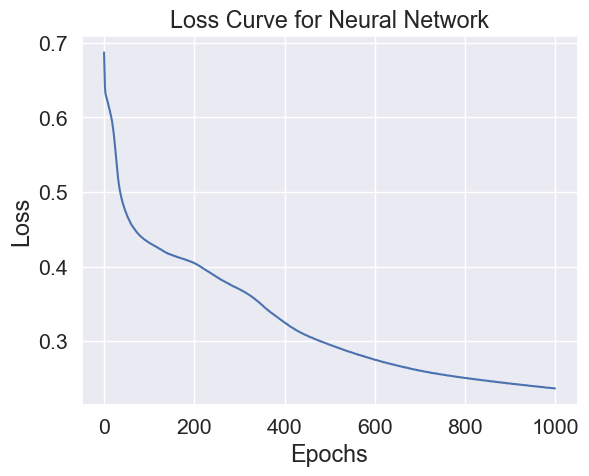

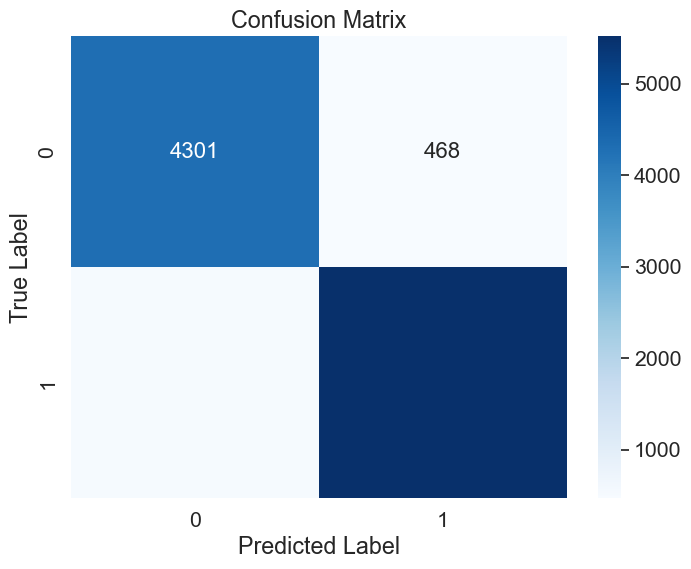

Architecture: (10, 10), Activation: tanh
Confusion Matrix:
[[4304  465]
 [ 396 5642]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4769
           1       0.92      0.93      0.93      6038

    accuracy                           0.92     10807
   macro avg       0.92      0.92      0.92     10807
weighted avg       0.92      0.92      0.92     10807


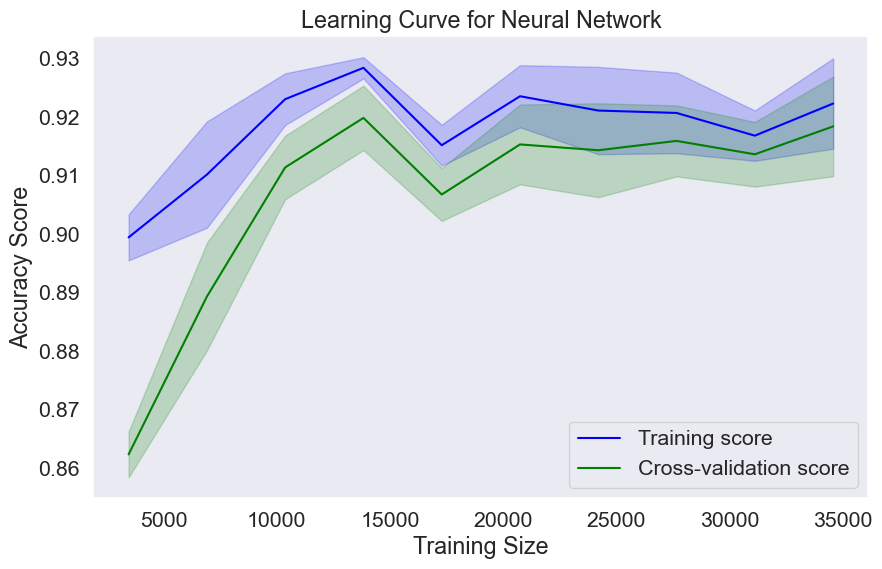

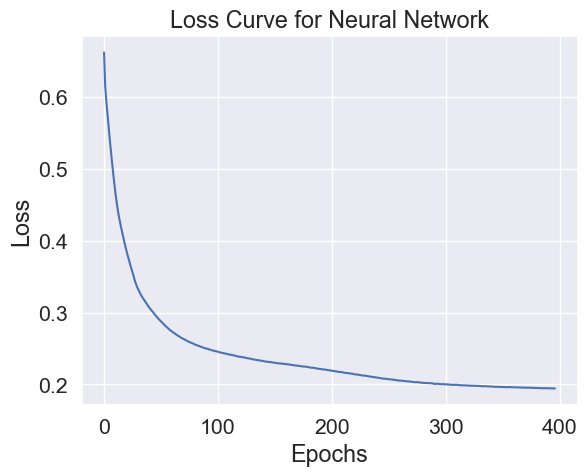

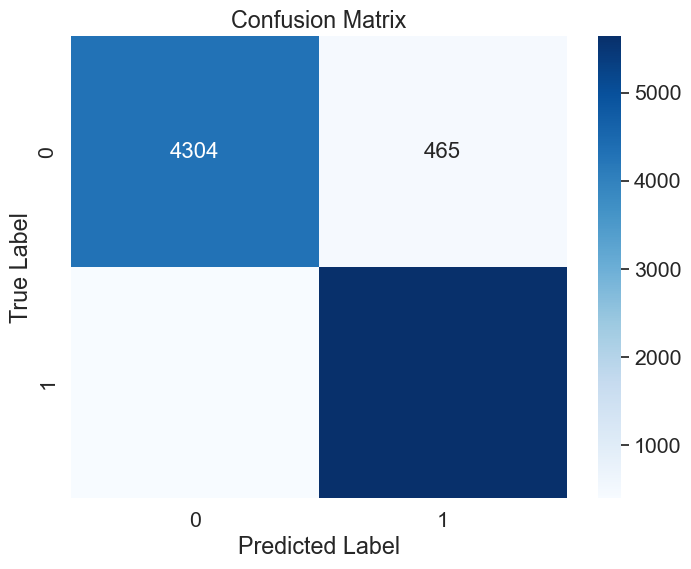

Architecture: (10, 10), Activation: identity
Confusion Matrix:
[[2498 2271]
 [1604 4434]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.52      0.56      4769
           1       0.66      0.73      0.70      6038

    accuracy                           0.64     10807
   macro avg       0.64      0.63      0.63     10807
weighted avg       0.64      0.64      0.64     10807


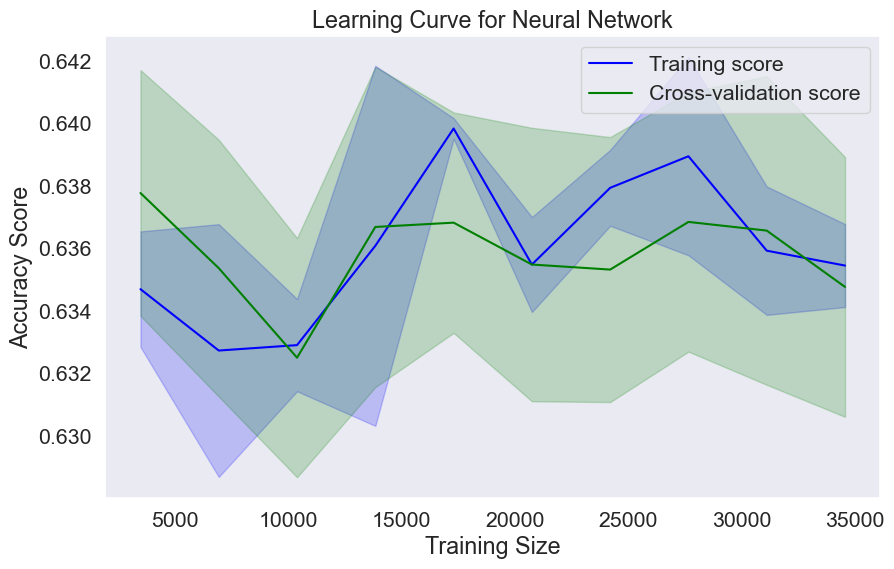

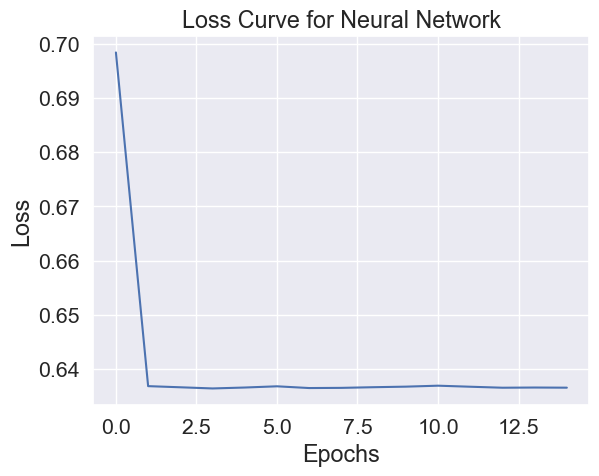

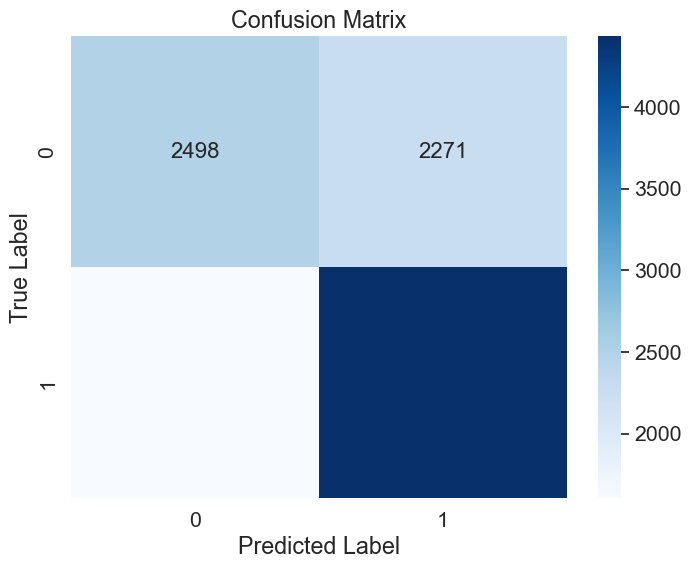

Architecture: (50, 50, 50), Activation: relu
Confusion Matrix:
[[4732   37]
 [ 111 5927]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4769
           1       0.99      0.98      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


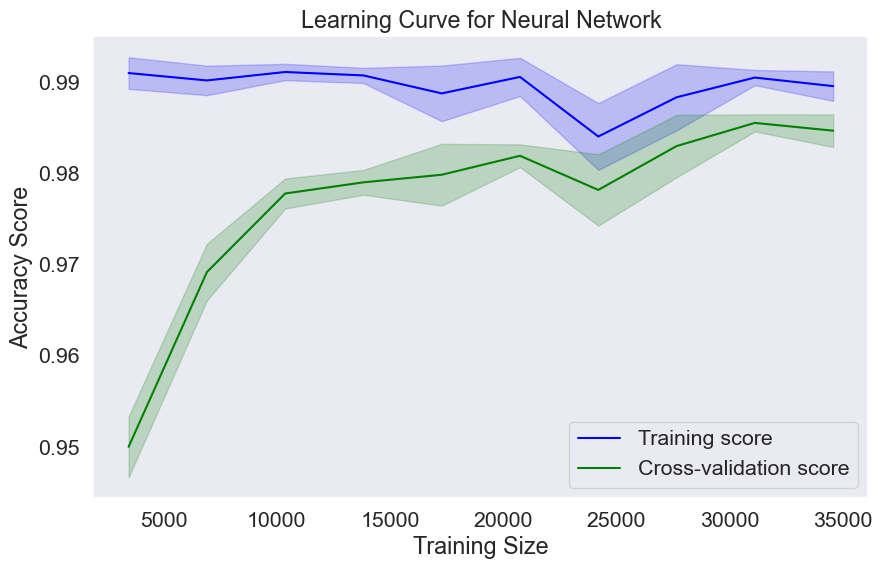

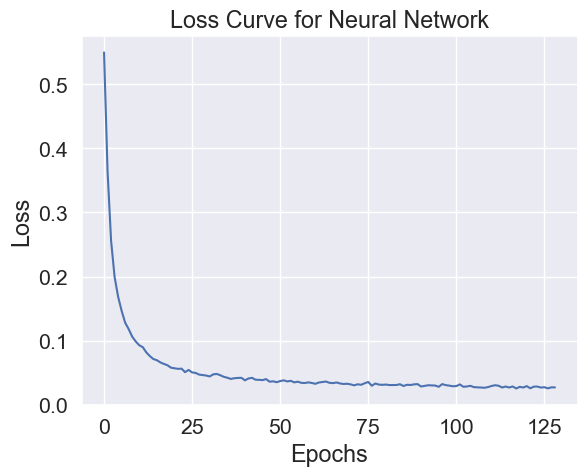

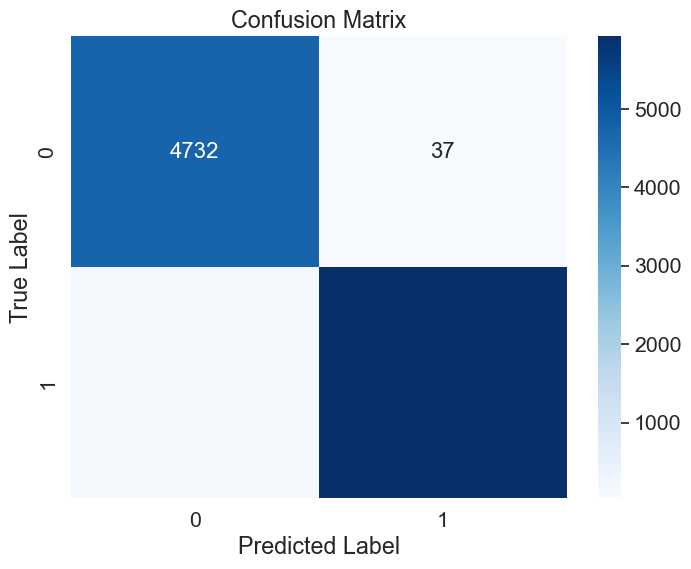

Architecture: (50, 50, 50), Activation: logistic
Confusion Matrix:
[[4681   88]
 [ 105 5933]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4769
           1       0.99      0.98      0.98      6038

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807


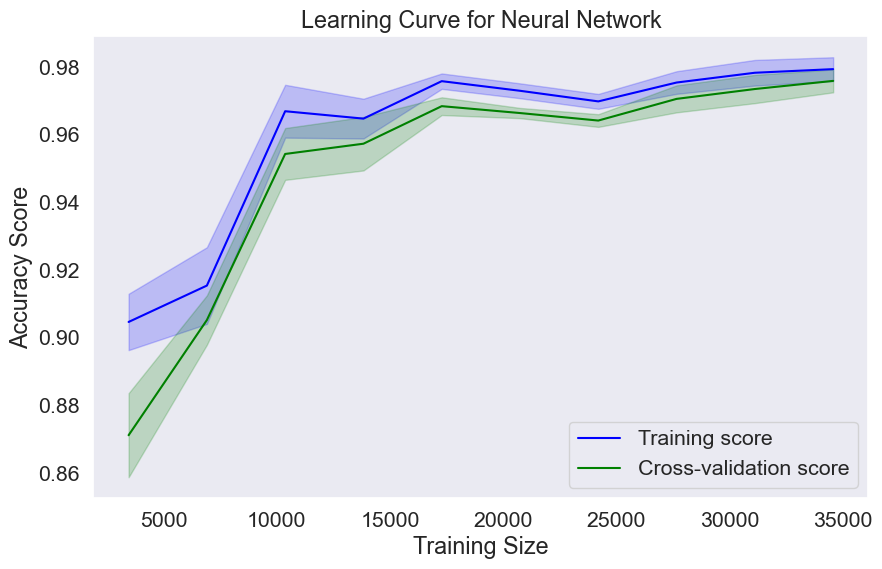

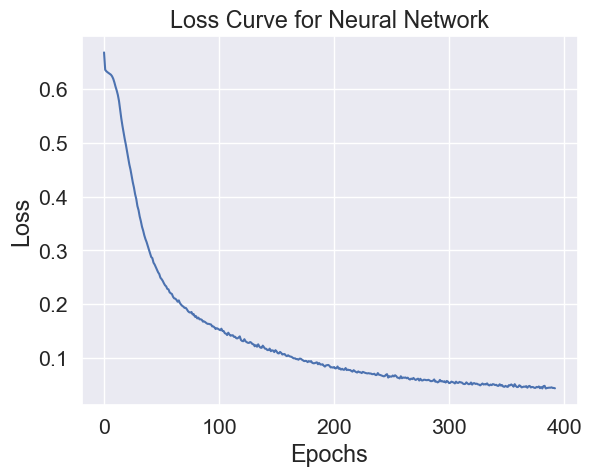

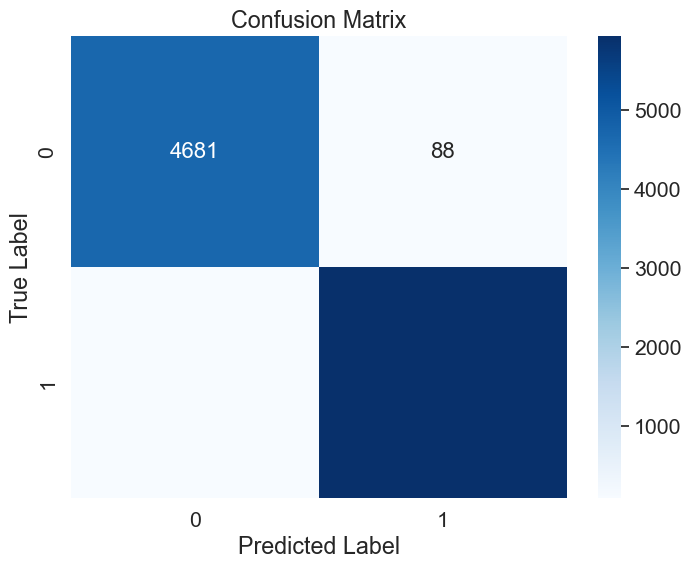

Architecture: (50, 50, 50), Activation: tanh
Confusion Matrix:
[[4724   45]
 [  62 5976]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


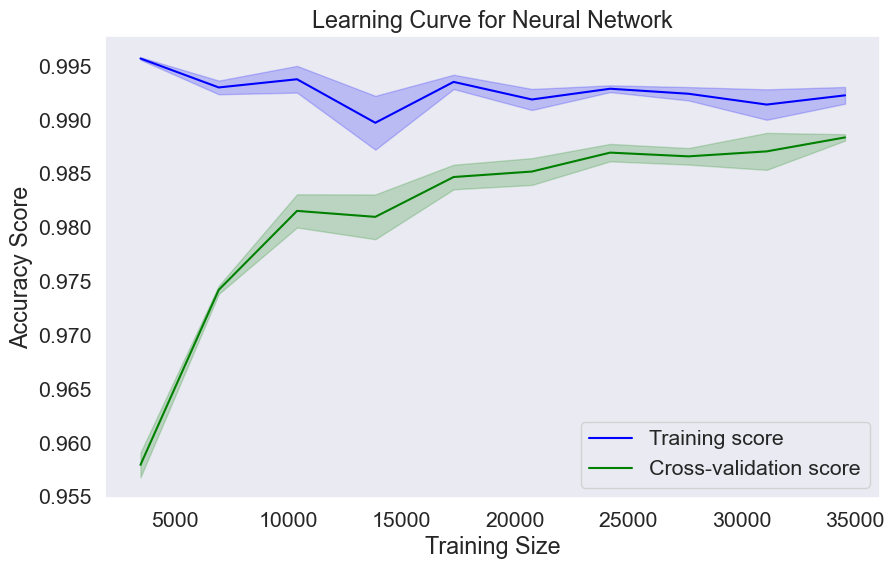

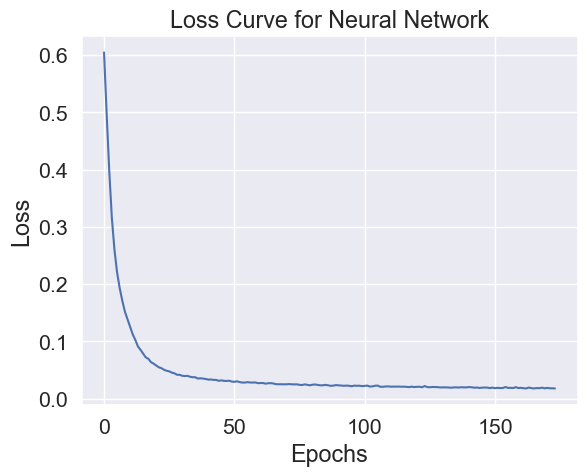

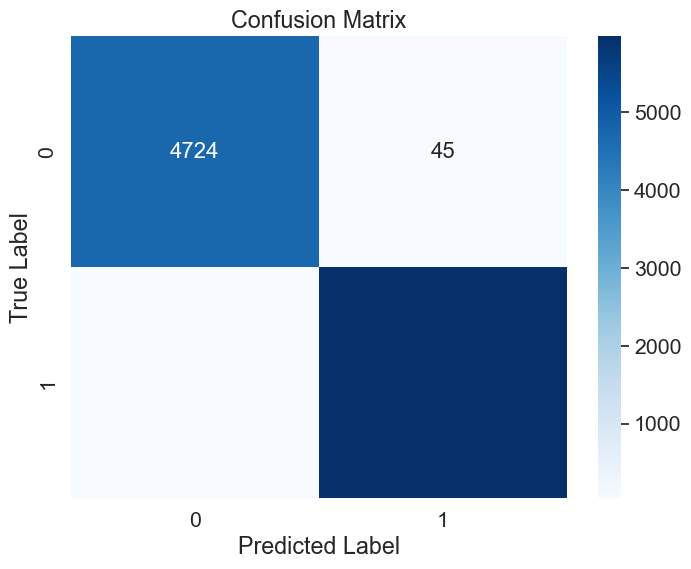

Architecture: (50, 50, 50), Activation: identity
Confusion Matrix:
[[2537 2232]
 [1664 4374]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.53      0.57      4769
           1       0.66      0.72      0.69      6038

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.64      0.64      0.64     10807


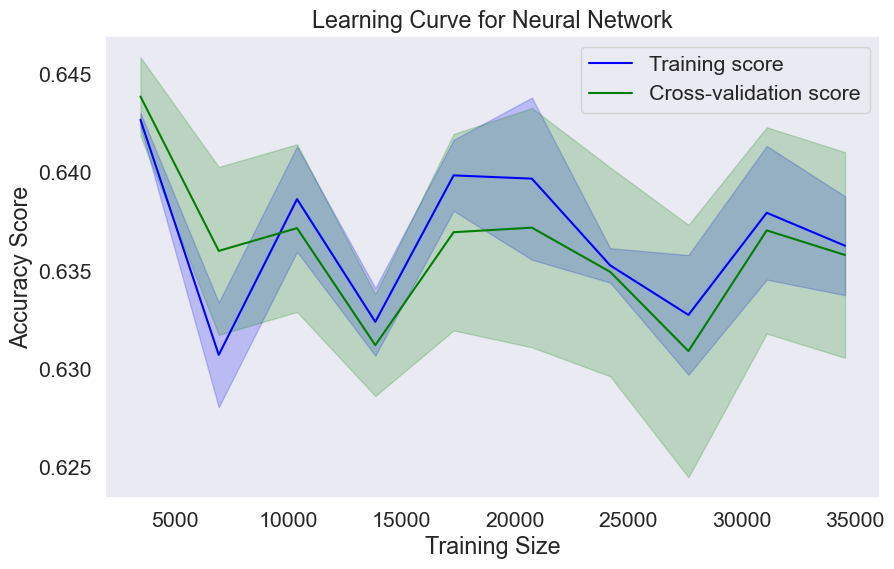

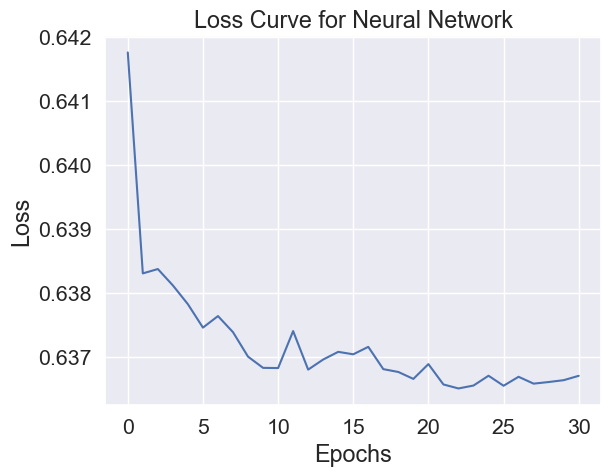

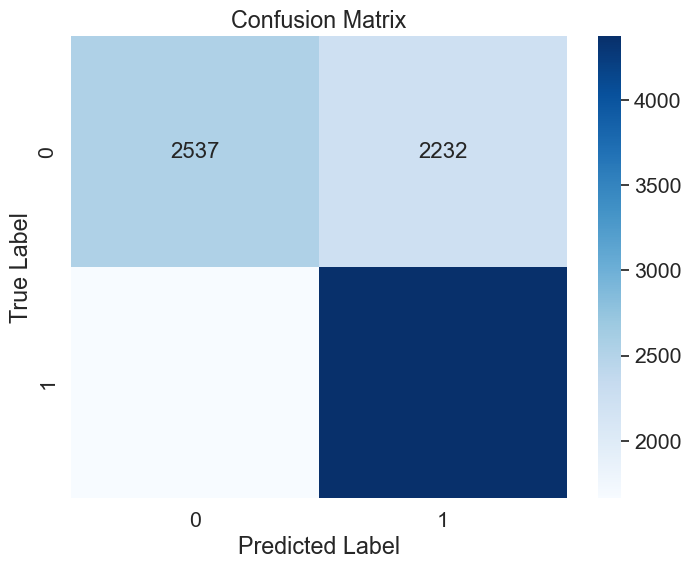

Architecture: (100, 50, 25), Activation: relu
Confusion Matrix:
[[4695   74]
 [  69 5969]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


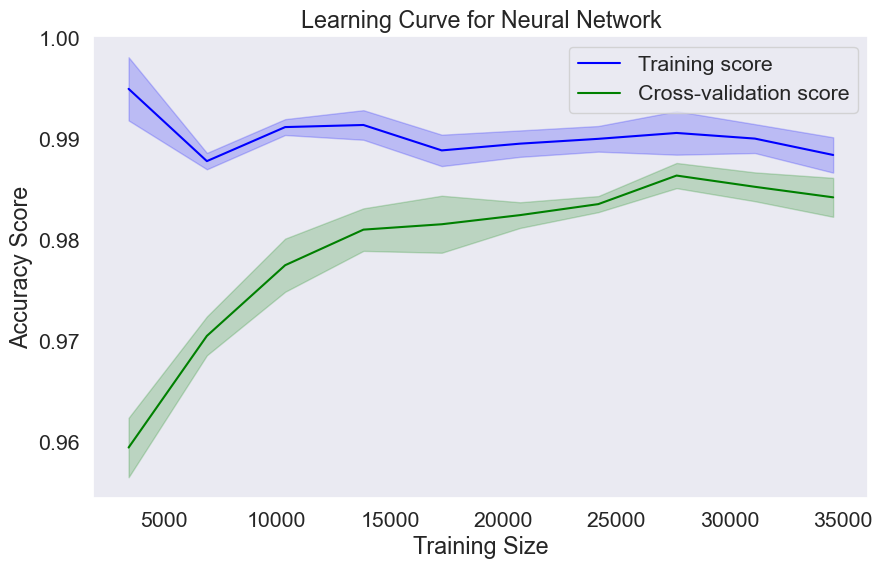

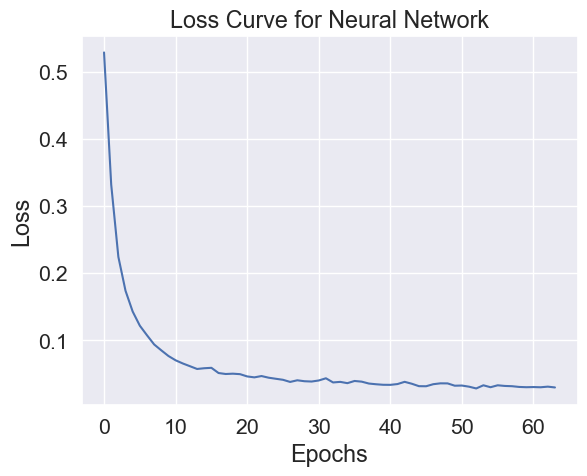

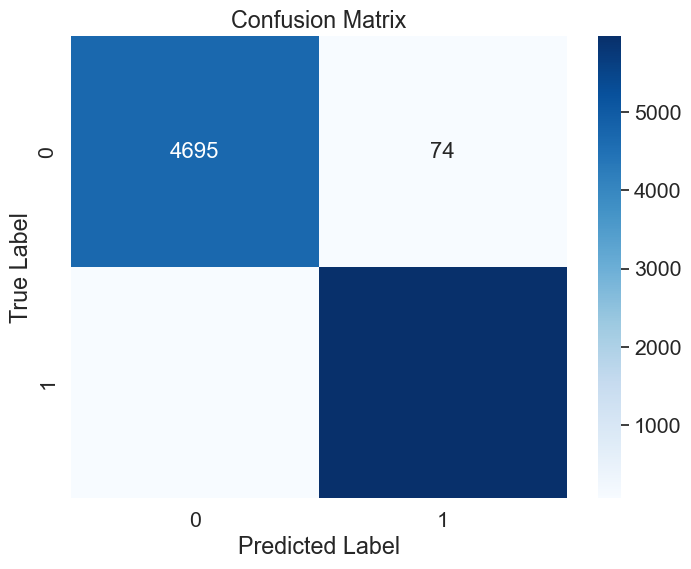

Architecture: (100, 50, 25), Activation: logistic
Confusion Matrix:
[[4712   57]
 [  90 5948]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


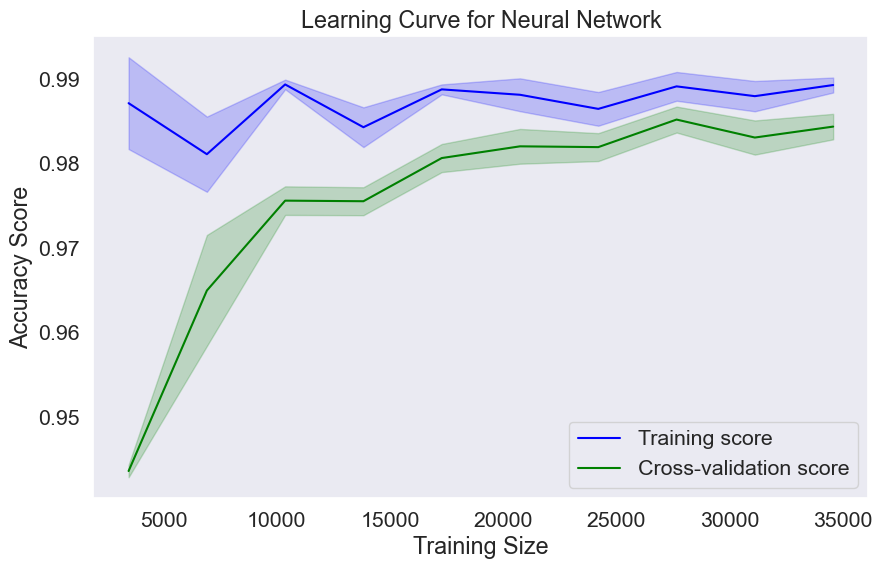

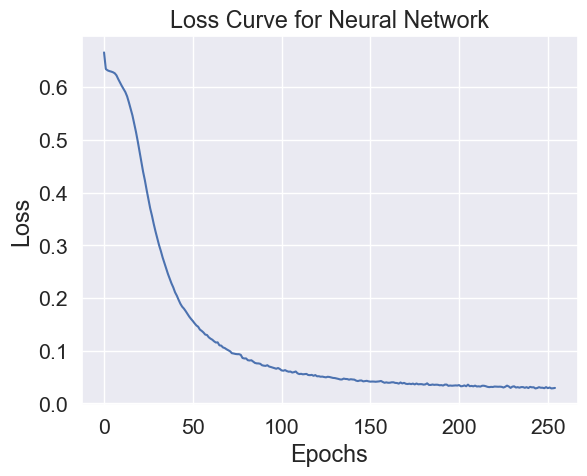

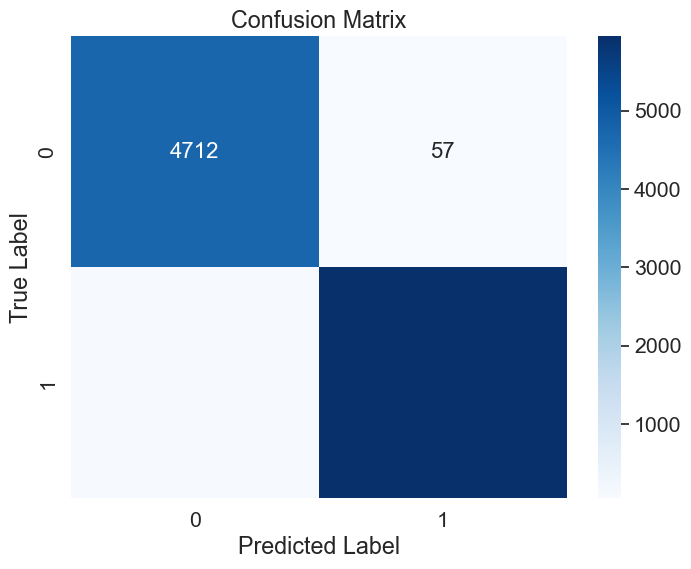

Architecture: (100, 50, 25), Activation: tanh
Confusion Matrix:
[[4706   63]
 [  46 5992]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


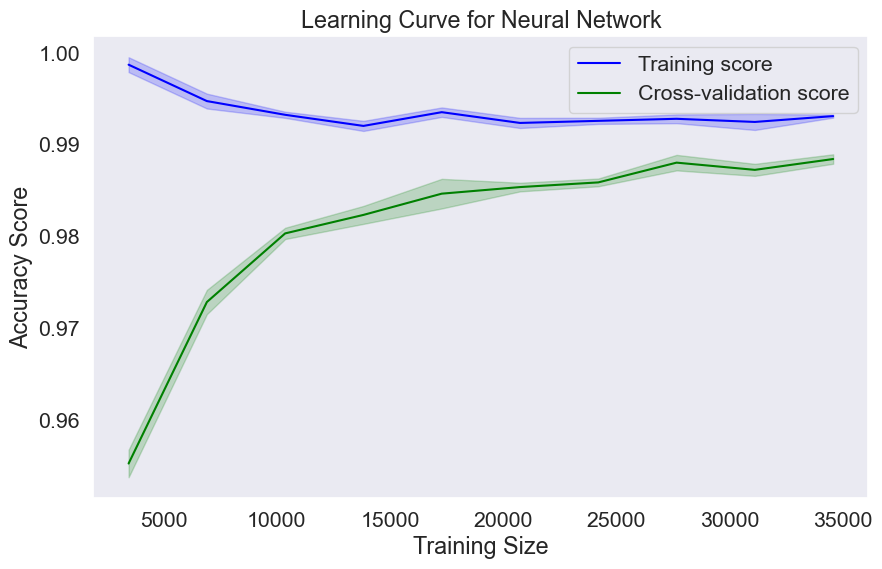

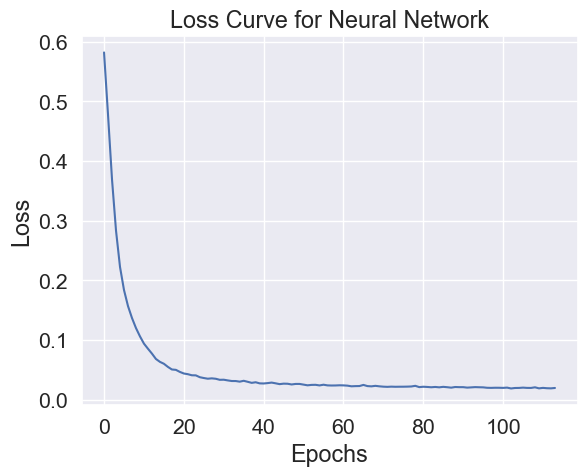

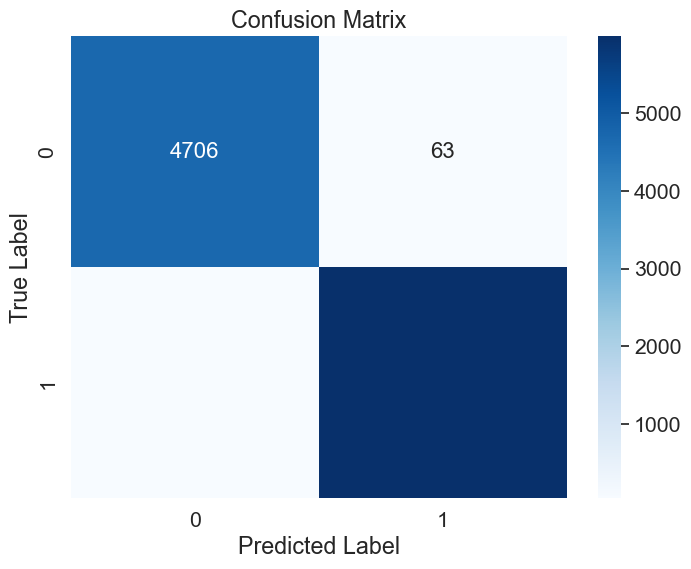

Architecture: (100, 50, 25), Activation: identity
Confusion Matrix:
[[2679 2090]
 [1804 4234]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      4769
           1       0.67      0.70      0.69      6038

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.64      0.64      0.64     10807


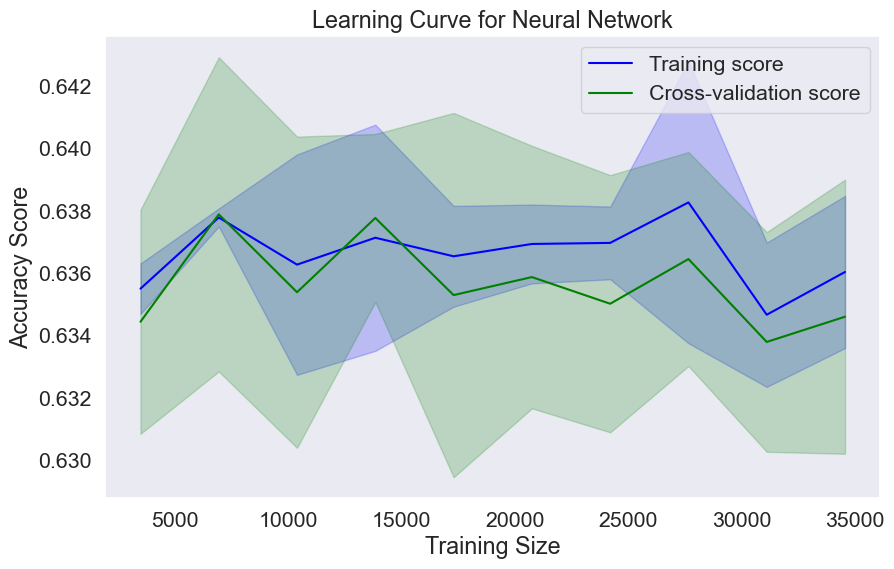

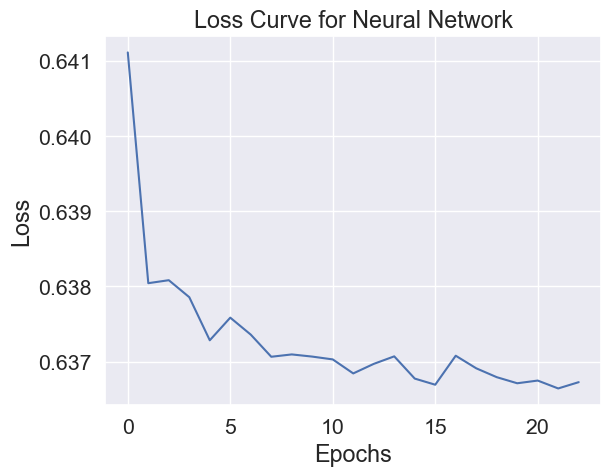

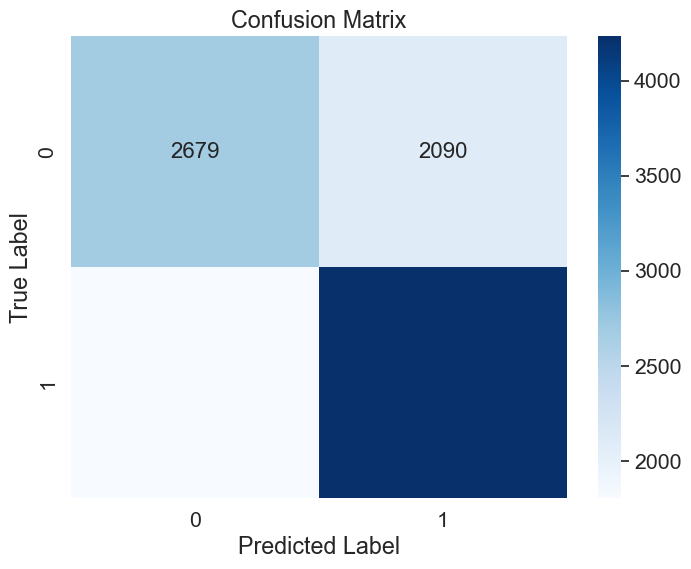

Architecture: (50, 25), Activation: relu
Confusion Matrix:
[[4692   77]
 [  69 5969]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


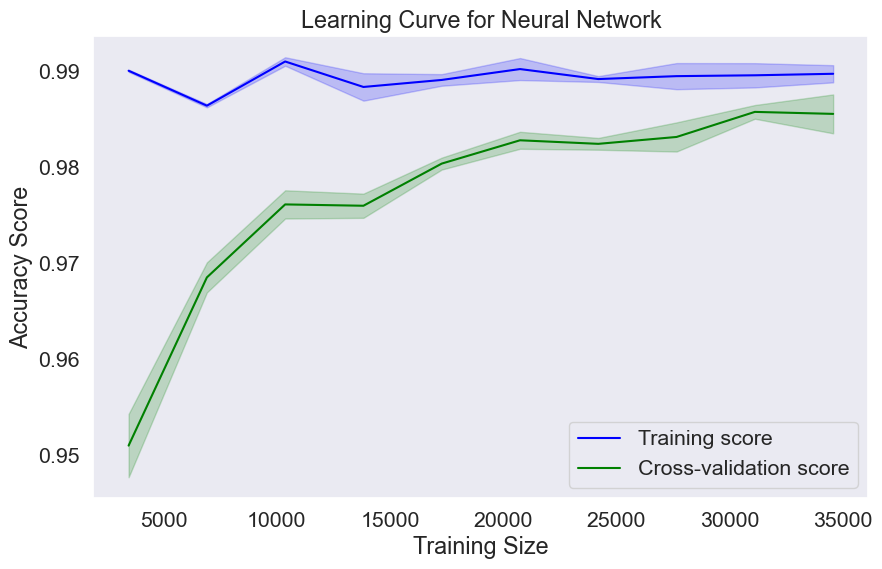

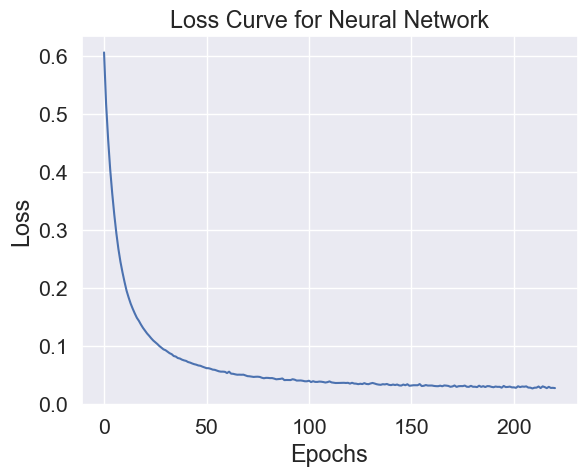

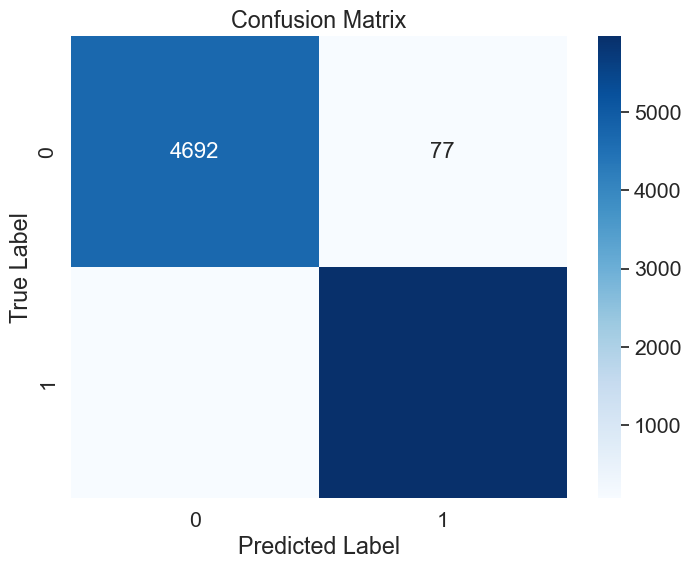

Architecture: (50, 25), Activation: logistic
Confusion Matrix:
[[4711   58]
 [  89 5949]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


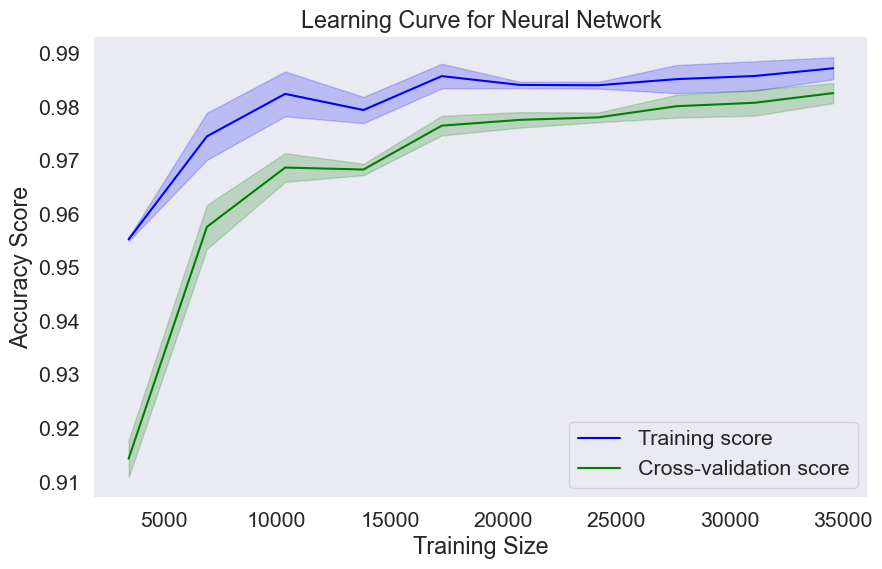

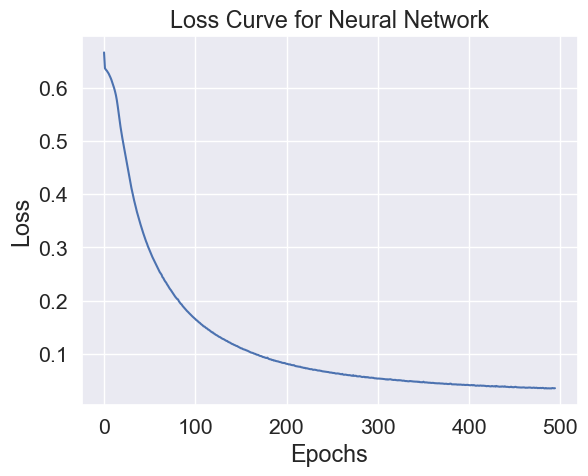

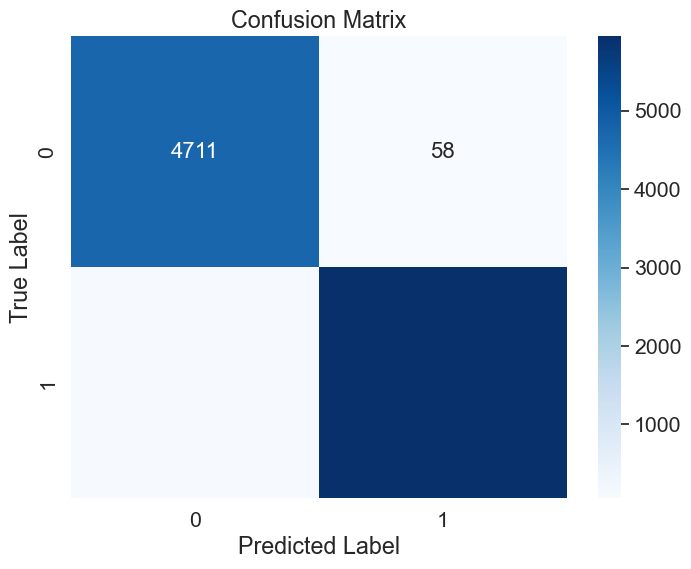

Architecture: (50, 25), Activation: tanh
Confusion Matrix:
[[4714   55]
 [  61 5977]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


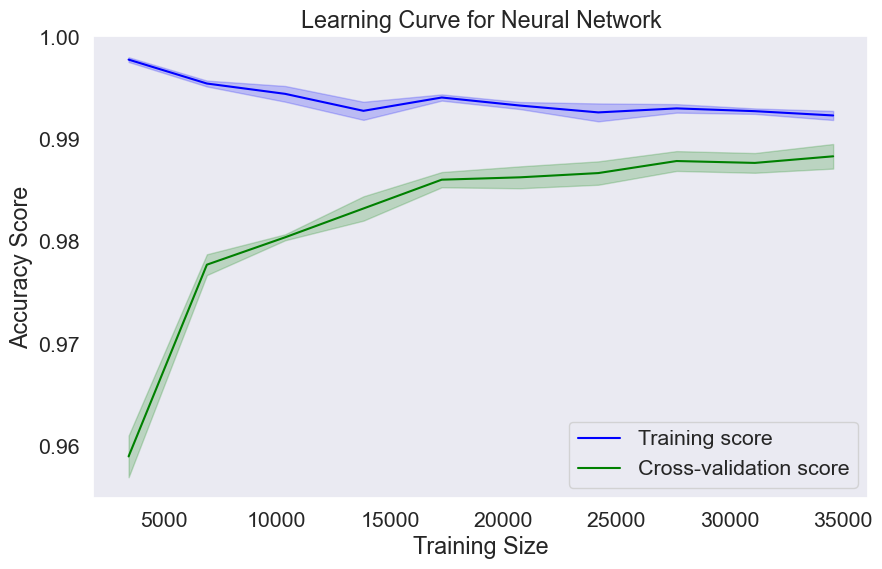

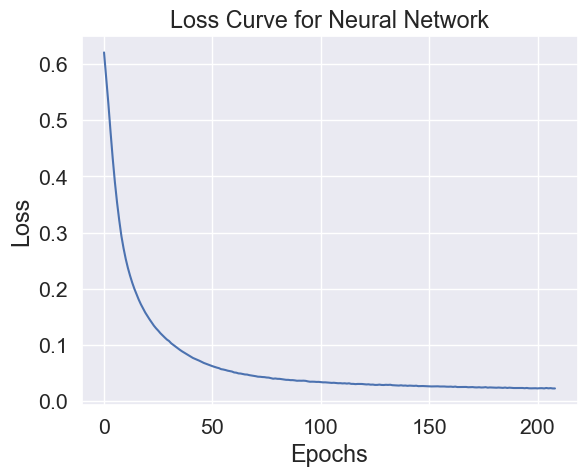

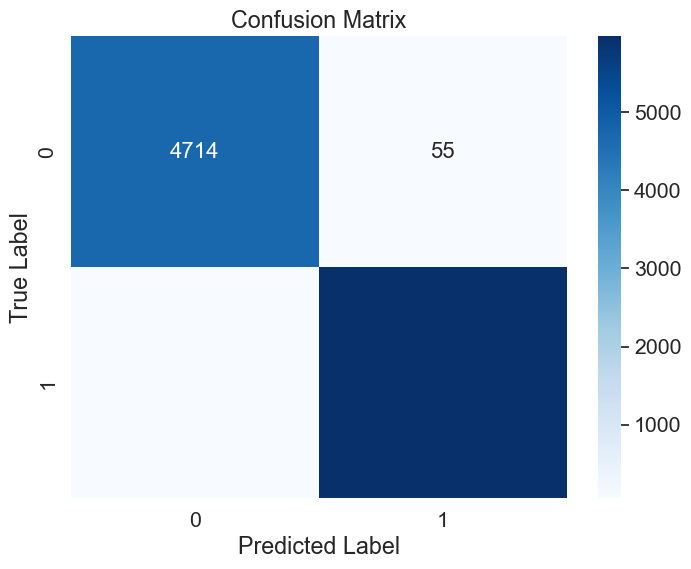

Architecture: (50, 25), Activation: identity
Confusion Matrix:
[[2576 2193]
 [1695 4343]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.54      0.57      4769
           1       0.66      0.72      0.69      6038

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.64      0.64      0.64     10807


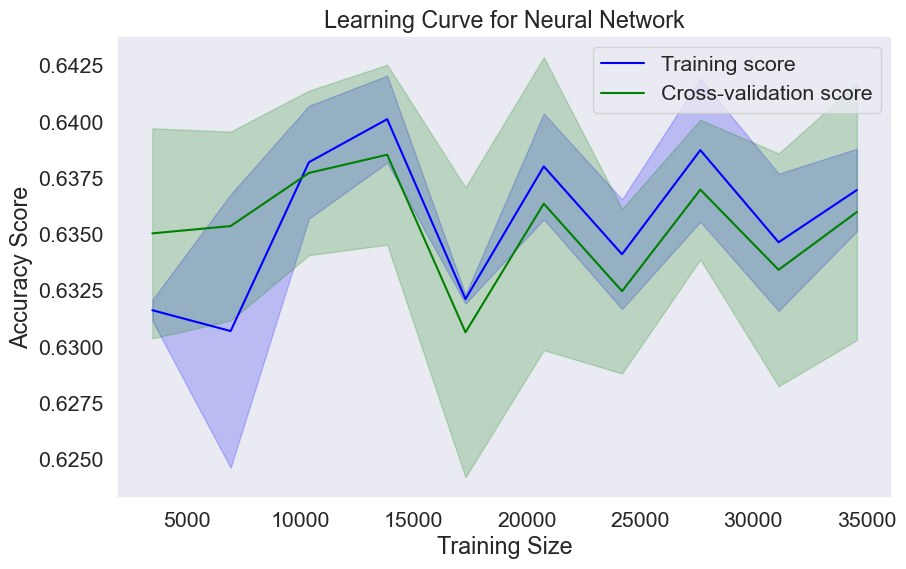

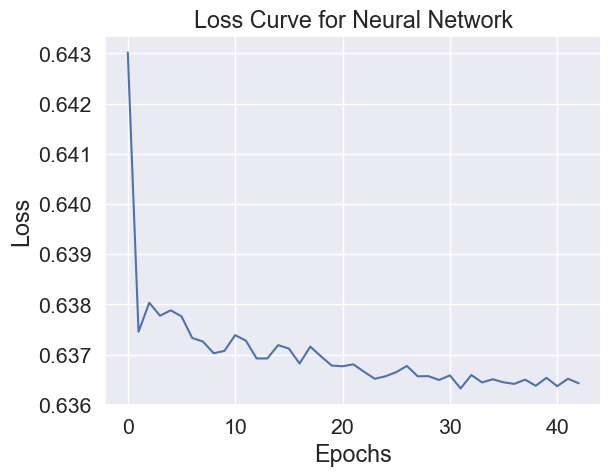

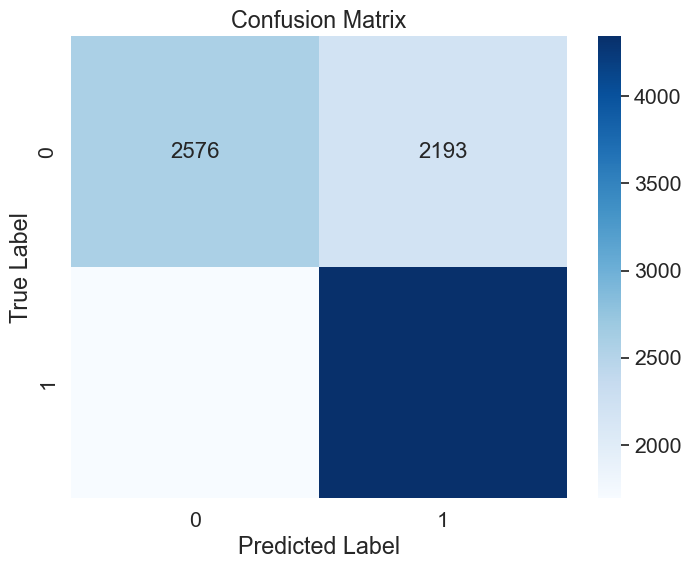

Architecture: (100,), Activation: relu
Confusion Matrix:
[[4682   87]
 [  92 5946]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4769
           1       0.99      0.98      0.99      6038

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807


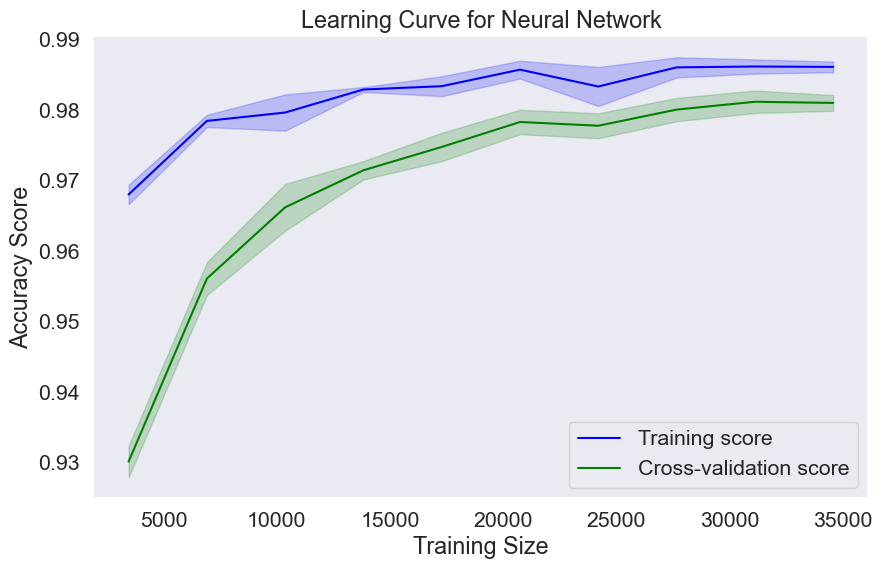

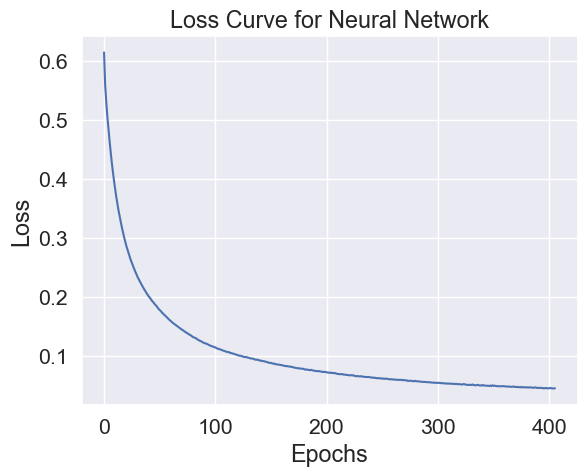

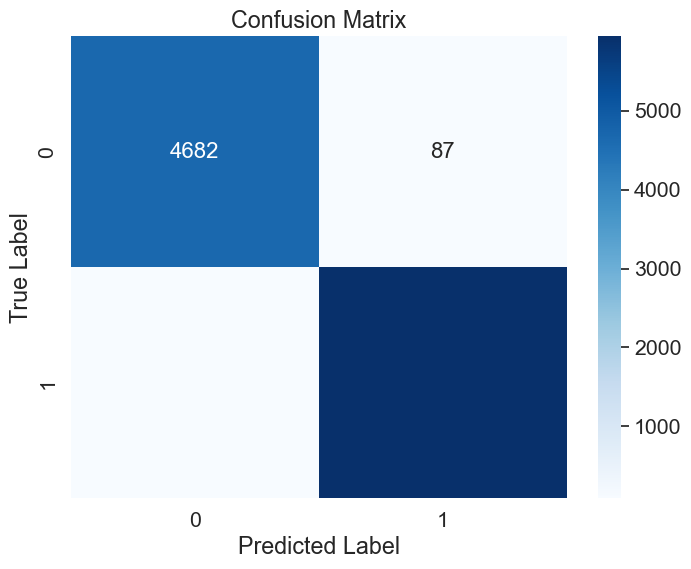

Architecture: (100,), Activation: logistic
Confusion Matrix:
[[4687   82]
 [  74 5964]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


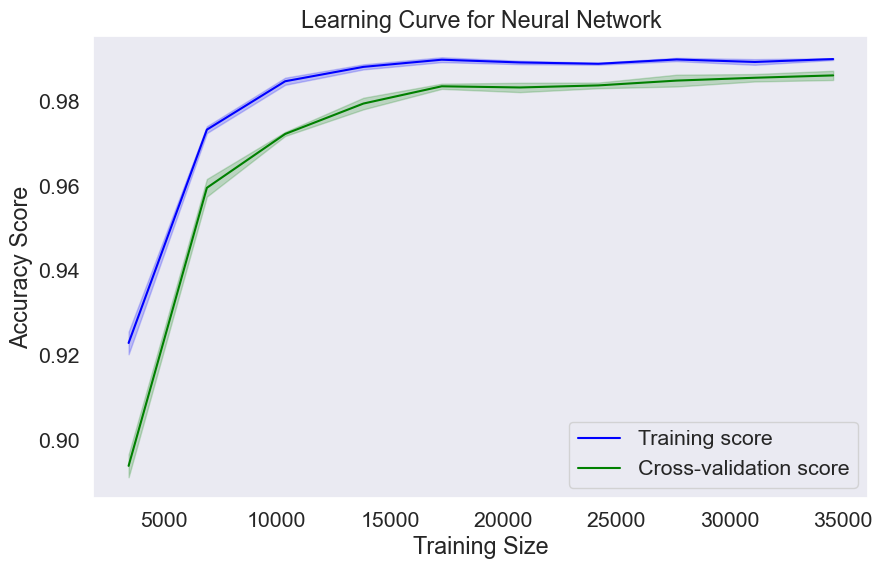

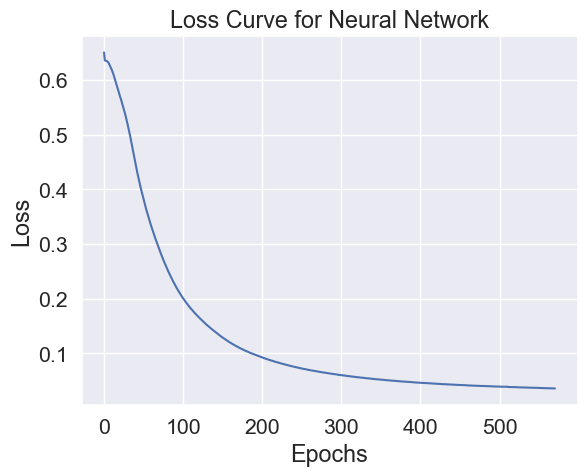

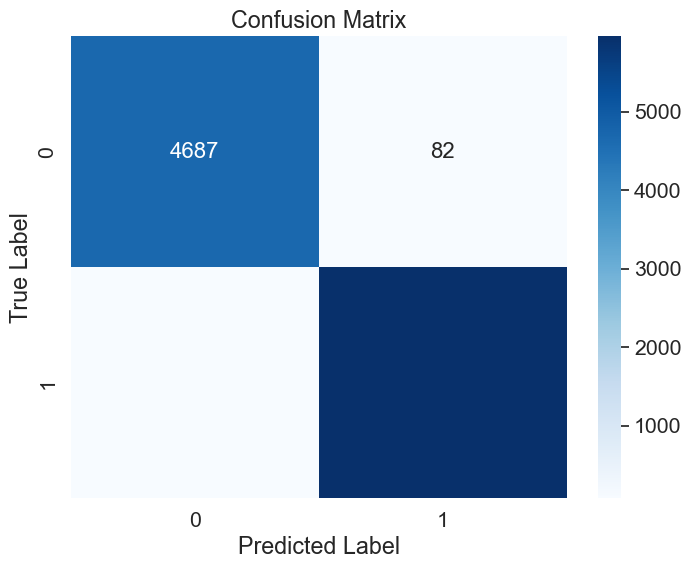

Architecture: (100,), Activation: tanh
Confusion Matrix:
[[4711   58]
 [  67 5971]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


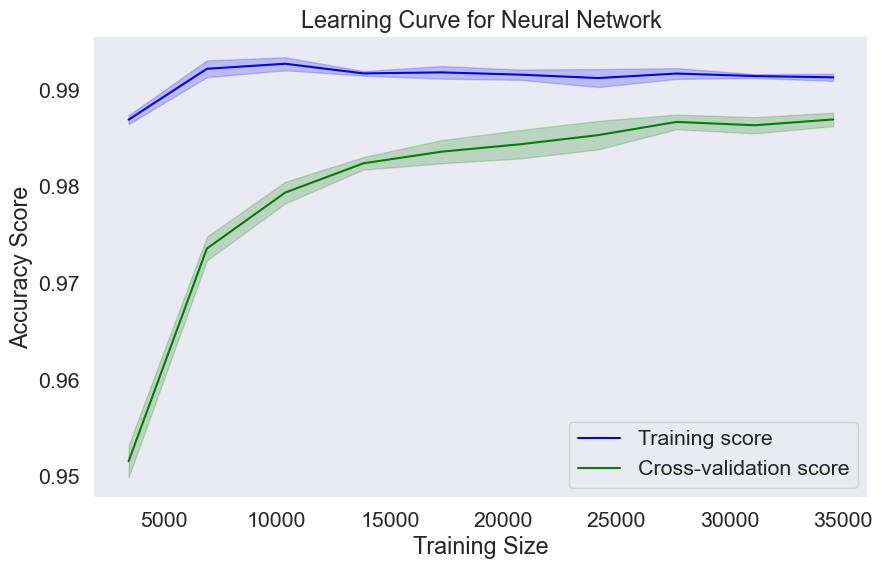

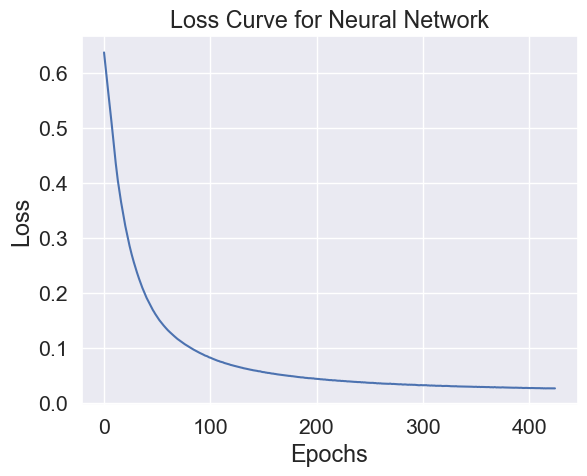

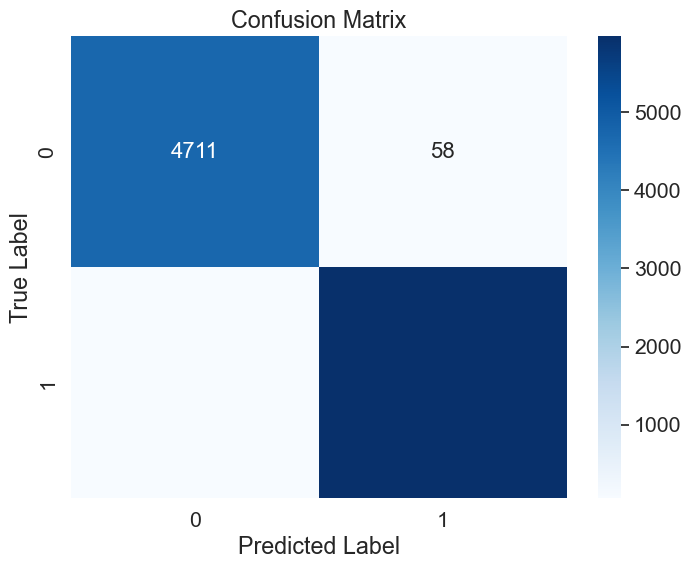

Architecture: (100,), Activation: identity
Confusion Matrix:
[[2522 2247]
 [1656 4382]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.53      0.56      4769
           1       0.66      0.73      0.69      6038

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.64      0.64      0.64     10807



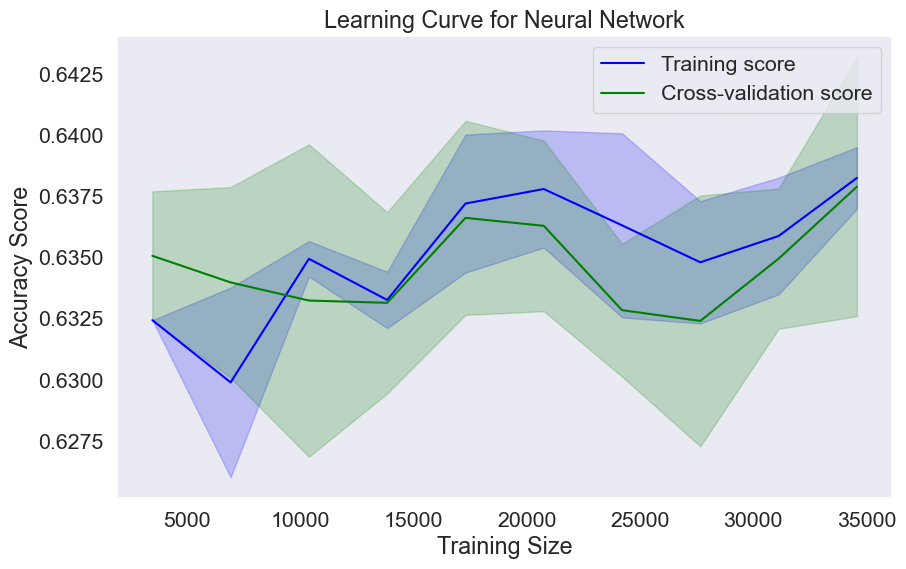

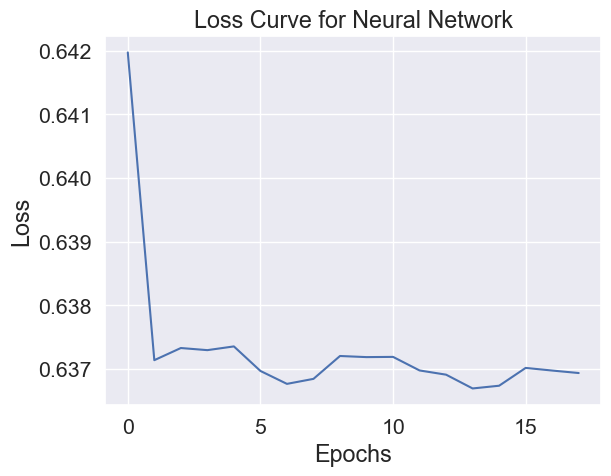

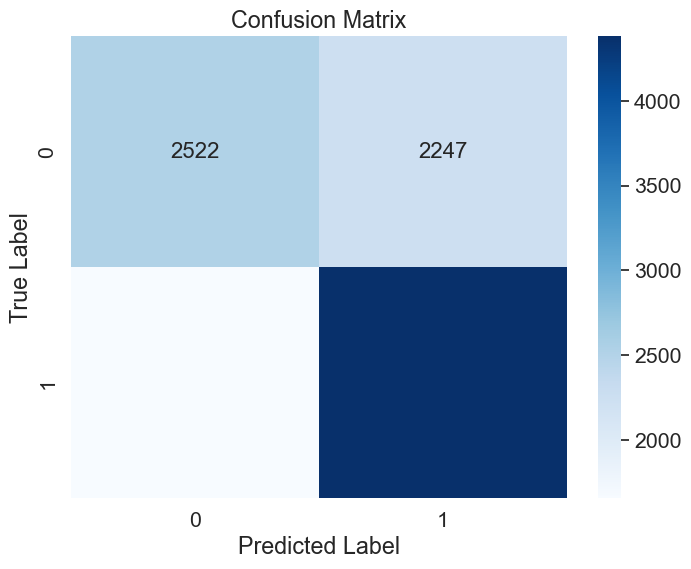

In [35]:
for result in results:
    print(f"Architecture: {result['architecture']}, Activation: {result['activation_function']}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("\n")
    
    plt.figure(figsize=(10, 6))
    plt.plot(result['train_sizes'], result['train_mean'], label='Training score', color='blue')
    plt.fill_between(result['train_sizes'], result['train_mean'] - result['train_std'], result['train_mean'] + result['train_std'], color='blue', alpha=0.2)
    plt.plot(result['train_sizes'], result['validation_mean'], label='Cross-validation score', color='green')
    plt.fill_between(result['train_sizes'], result['validation_mean'] - result['validation_std'], result['validation_mean'] + result['validation_std'], color='green', alpha=0.2)

    plt.title('Learning Curve for Neural Network')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

    plt.plot(result['nn'].loss_curve_)
    plt.title('Loss Curve for Neural Network')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [27]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Store results
knn_results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(cX_train, cy_train)
    
    predictions = knn.predict(cX_test)
    conf_matrix = cm(cy_test, predictions)
    class_report = cr(cy_test, predictions)
    
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=knn,
        X=cX_train,
        y=cy_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)
    
    knn_results.append(
        {'k': k,
         'knn': knn,
         'confusion_matrix': conf_matrix,
         'classification_report': class_report,
         'train_mean': train_mean,
         'train_std': train_std,
         'train_sizes': train_sizes,
         'validation_mean': validation_mean,
         'validation_std': validation_std}
    )

k: 1
Confusion Matrix:
[[4697   72]
 [  62 5976]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


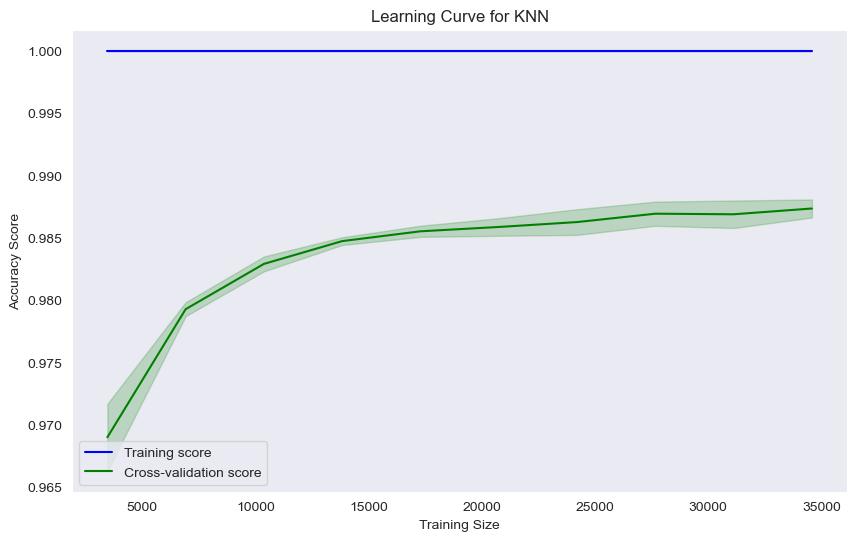

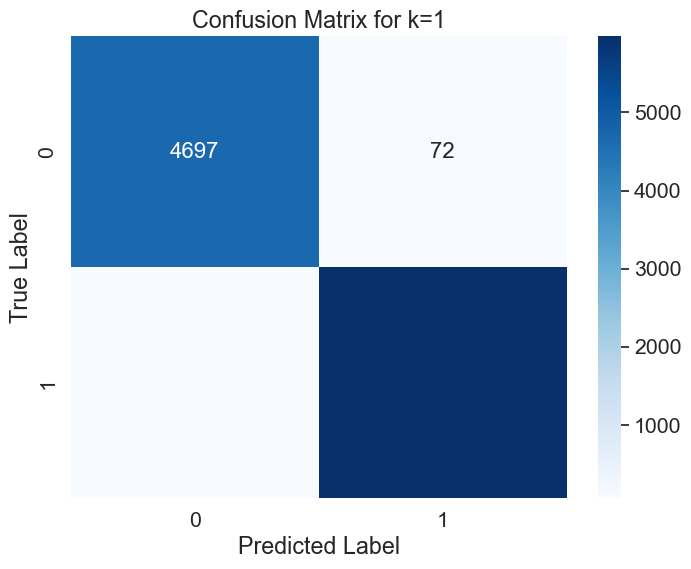

k: 3
Confusion Matrix:
[[4707   62]
 [  57 5981]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


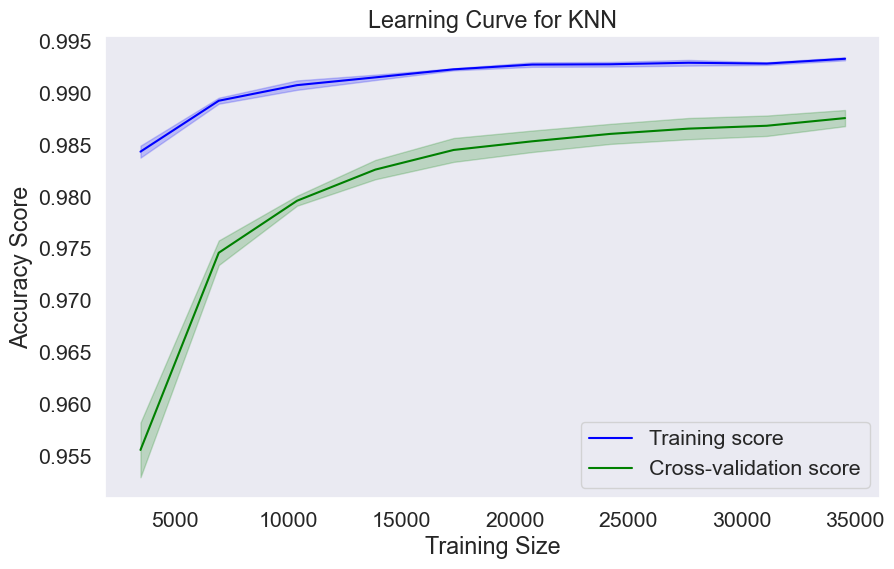

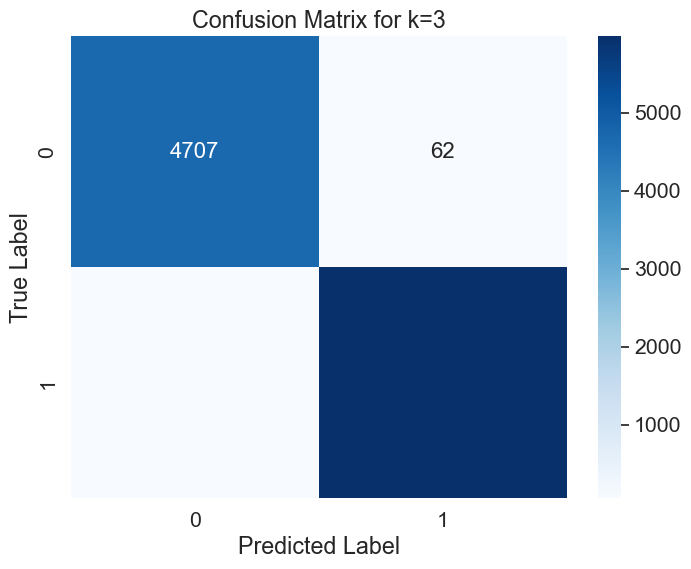

k: 5
Confusion Matrix:
[[4705   64]
 [  57 5981]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


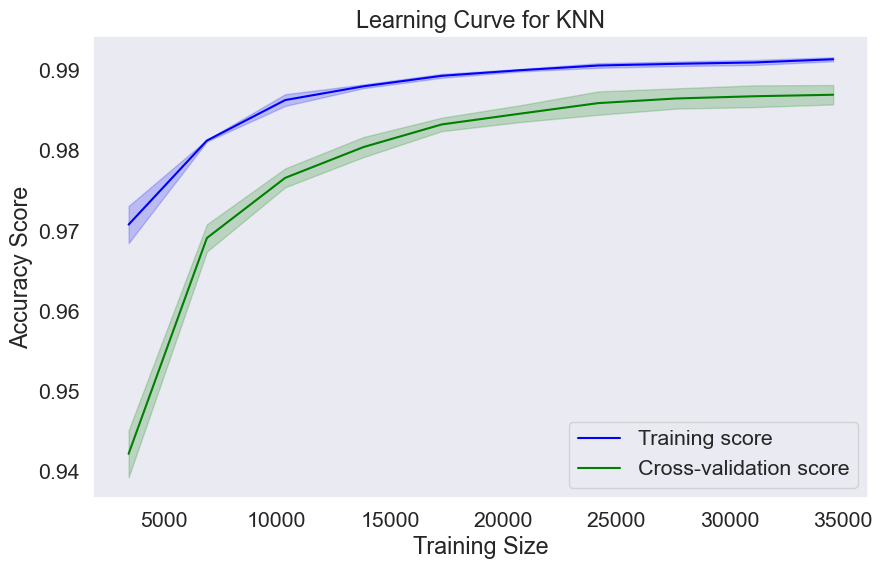

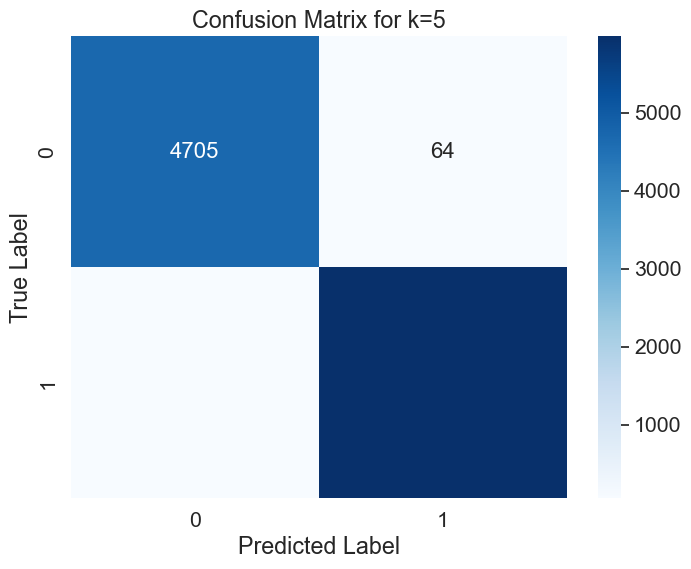

k: 7
Confusion Matrix:
[[4700   69]
 [  57 5981]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


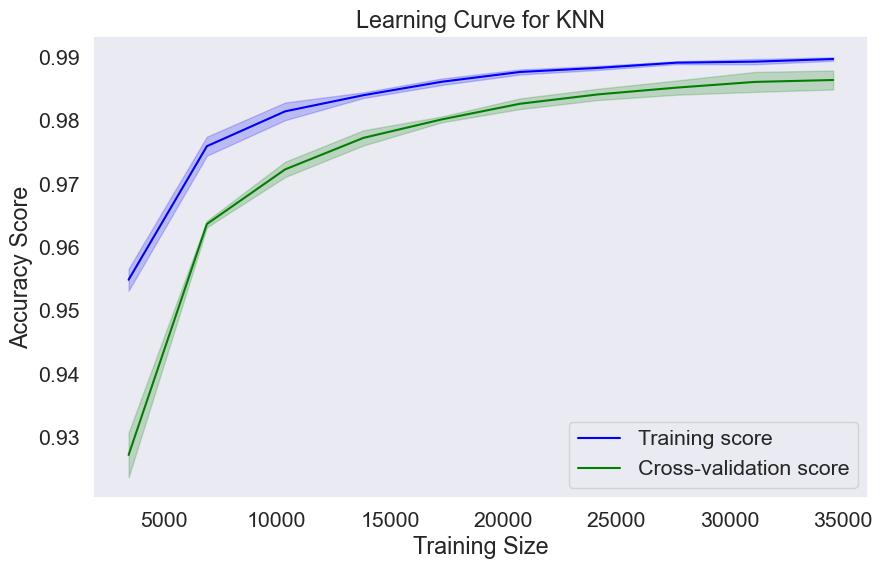

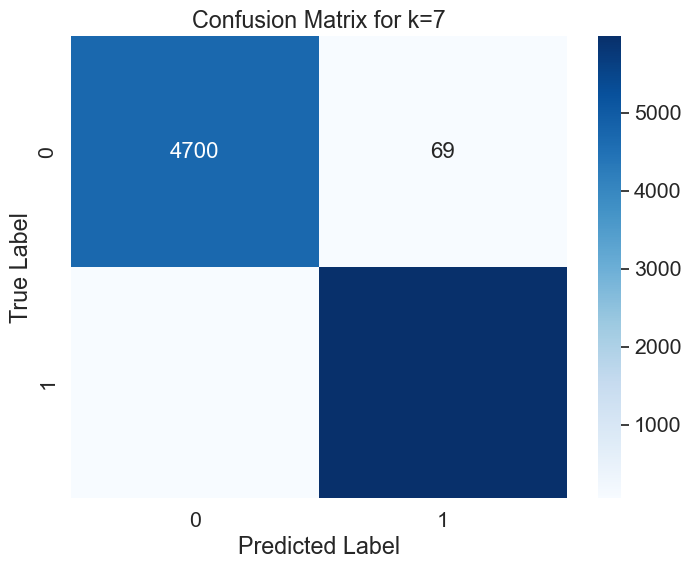

k: 9
Confusion Matrix:
[[4696   73]
 [  67 5971]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


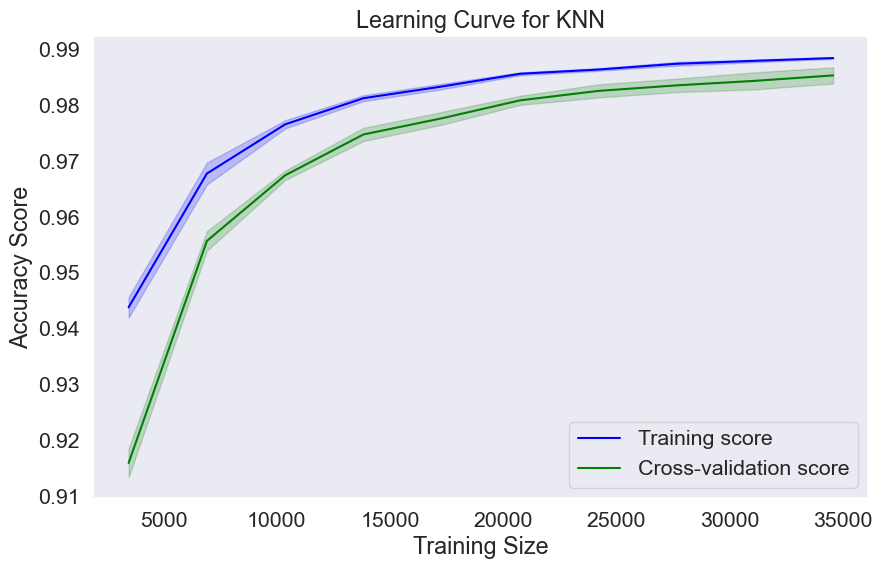

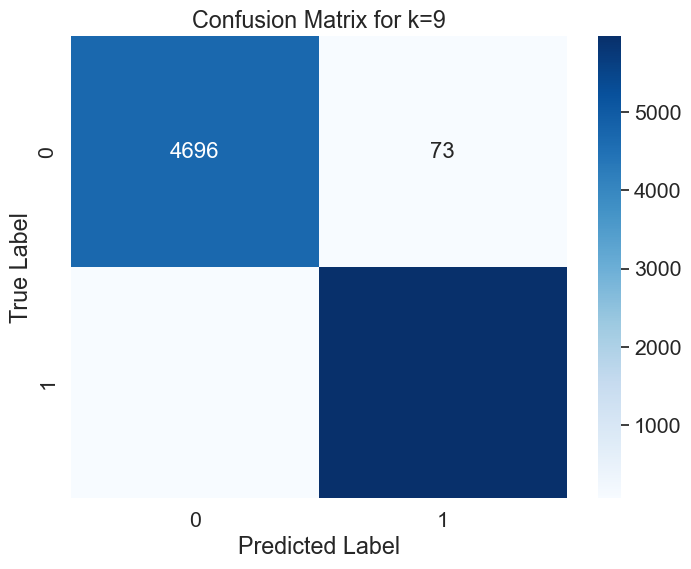

k: 11
Confusion Matrix:
[[4692   77]
 [  68 5970]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


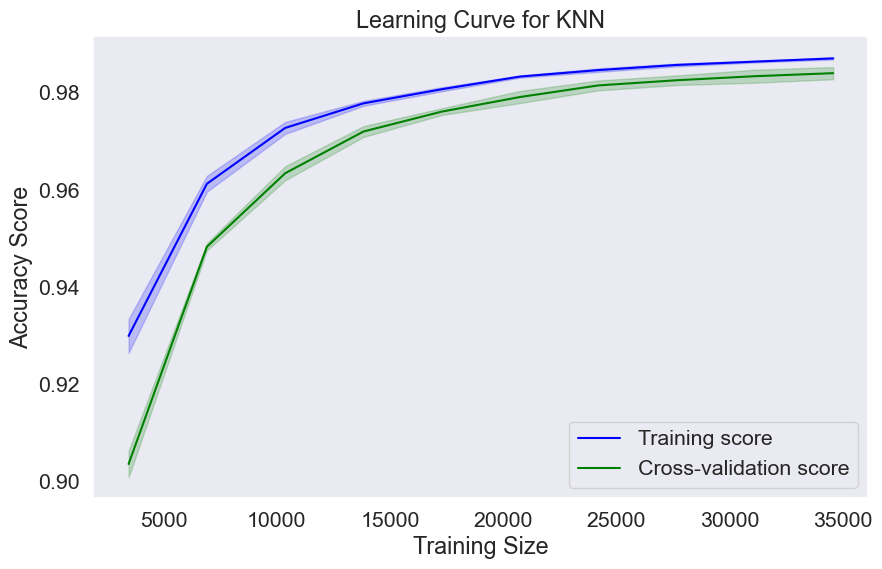

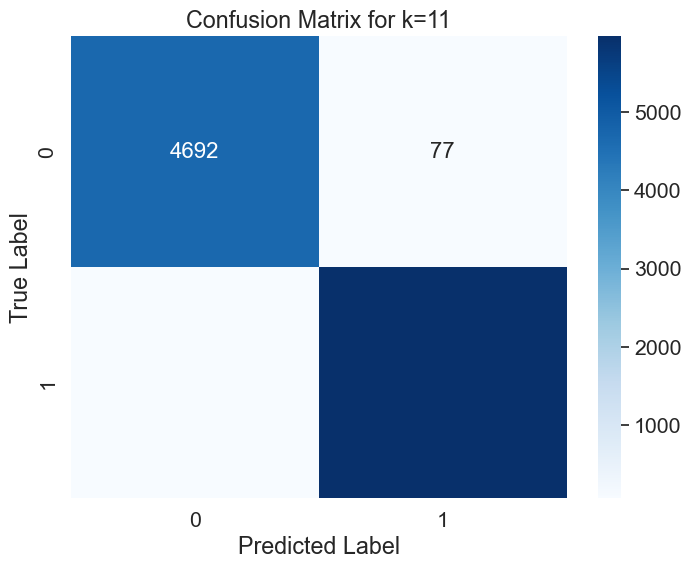

k: 13
Confusion Matrix:
[[4688   81]
 [  70 5968]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


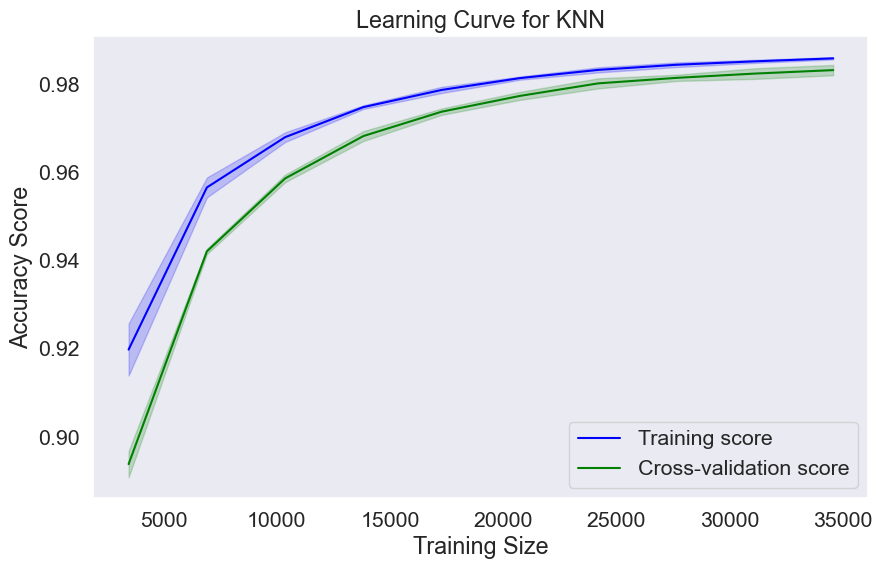

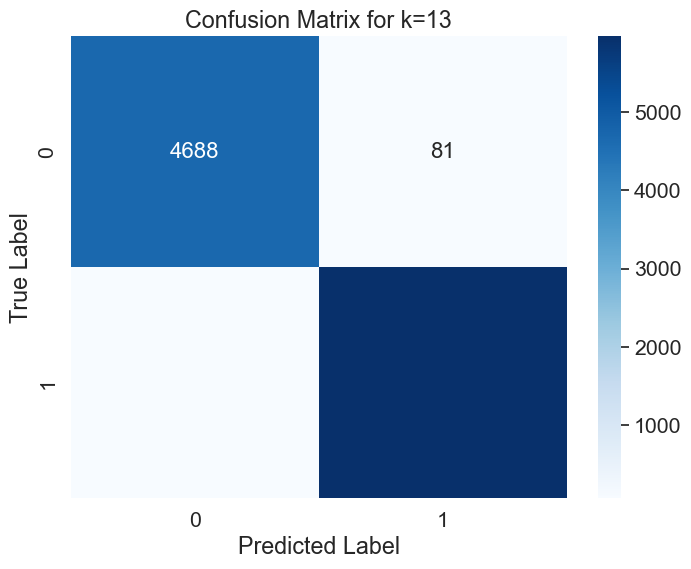

k: 15
Confusion Matrix:
[[4684   85]
 [  75 5963]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4769
           1       0.99      0.99      0.99      6038

    accuracy                           0.99     10807
   macro avg       0.99      0.98      0.98     10807
weighted avg       0.99      0.99      0.99     10807


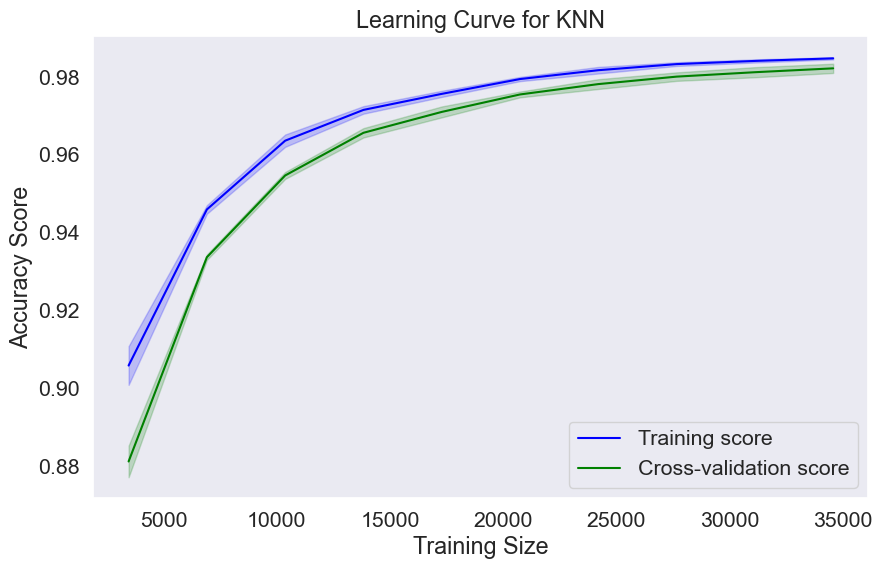

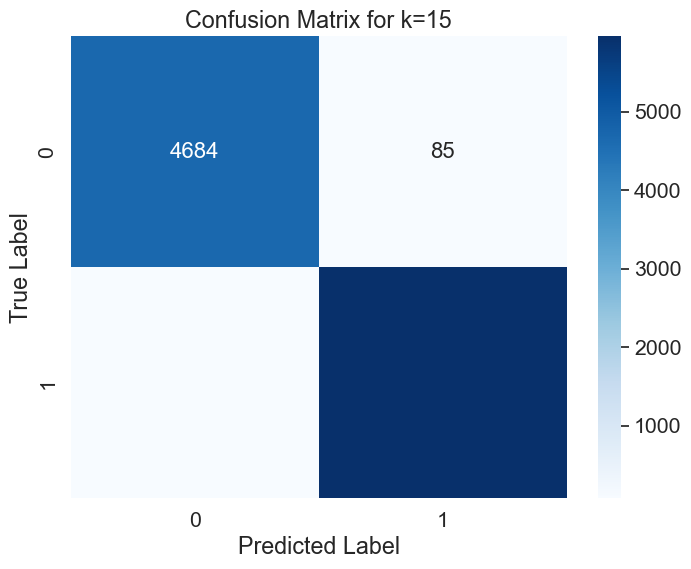

In [28]:
for result in knn_results:
    print(f"k: {result['k']}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("\n")
    
    plt.figure(figsize=(10, 6))
    plt.plot(result['train_sizes'], result['train_mean'], label='Training score', color='blue')
    plt.fill_between(result['train_sizes'], result['train_mean'] - result['train_std'], result['train_mean'] + result['train_std'], color='blue', alpha=0.2)
    plt.plot(result['train_sizes'], result['validation_mean'], label='Cross-validation score', color='green')
    plt.fill_between(result['train_sizes'], result['validation_mean'] - result['validation_std'], result['validation_mean'] + result['validation_std'], color='green', alpha=0.2)

    plt.title('Learning Curve for KNN')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title(f'Confusion Matrix for k={result["k"]}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [29]:
# Define different SVM kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Store results
svm_results = []

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=34)
    svm.fit(cX_train, cy_train)
    
    predictions = svm.predict(cX_test)
    conf_matrix = cm(cy_test, predictions)
    class_report = cr(cy_test, predictions)
    
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=svm,
        X=cX_train,
        y=cy_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)
    
    svm_results.append(
        {'kernel': kernel,
         'svm': svm,
         'confusion_matrix': conf_matrix,
         'classification_report': class_report,
         'train_mean': train_mean,
         'train_std': train_std,
         'train_sizes': train_sizes,
         'validation_mean': validation_mean,
         'validation_std': validation_std}
    )

/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Kernel: linear
Confusion Matrix:
[[2739 2030]
 [1855 4183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.57      0.59      4769
           1       0.67      0.69      0.68      6038

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.64      0.64      0.64     10807


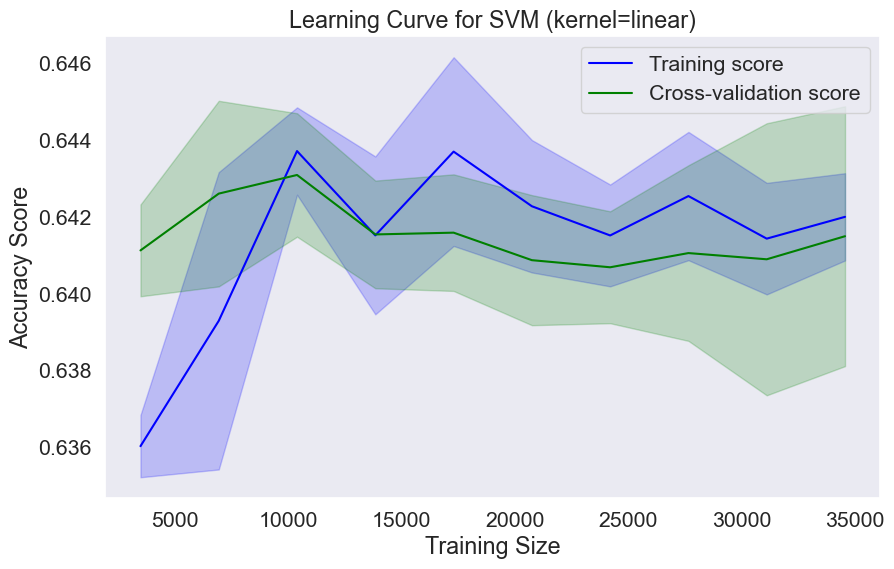

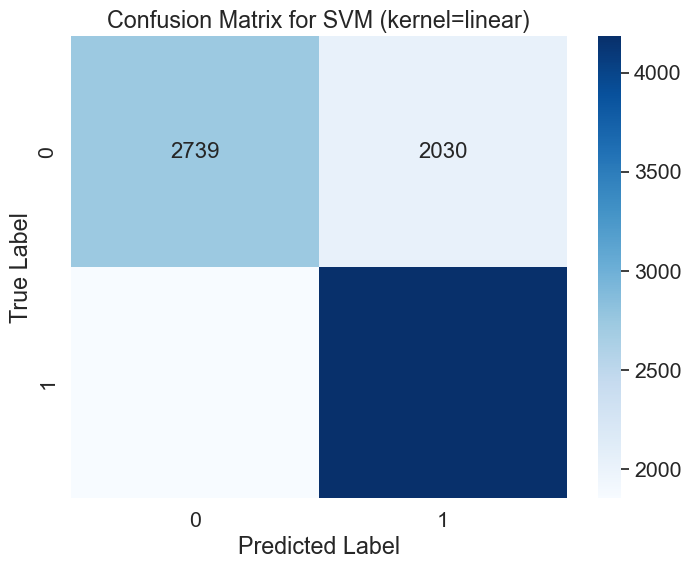

Kernel: poly
Confusion Matrix:
[[3413 1356]
 [1122 4916]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      4769
           1       0.78      0.81      0.80      6038

    accuracy                           0.77     10807
   macro avg       0.77      0.76      0.77     10807
weighted avg       0.77      0.77      0.77     10807


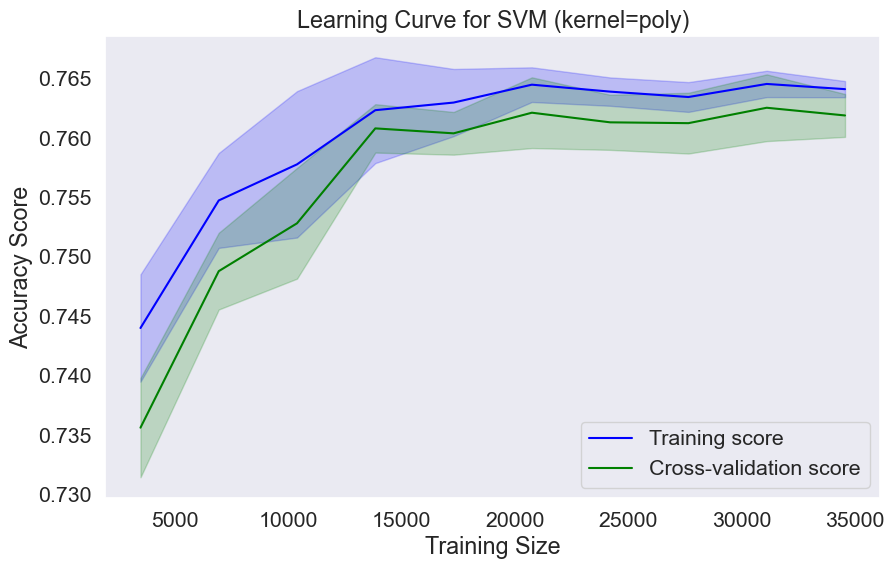

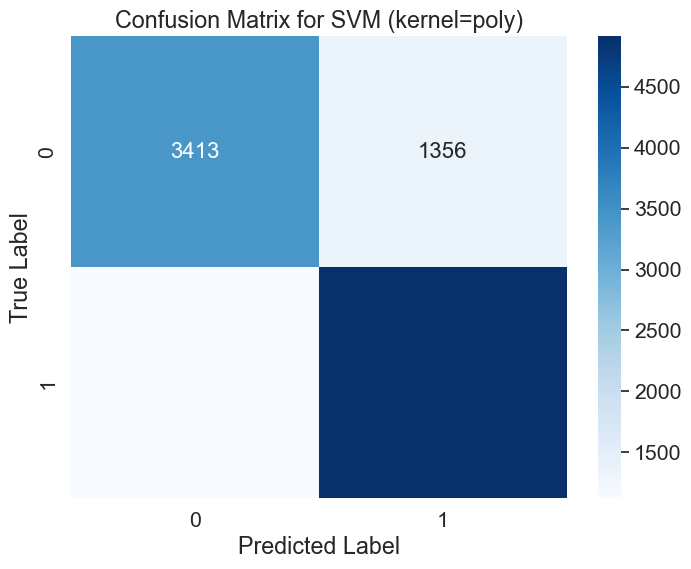

Kernel: rbf
Confusion Matrix:
[[4278  491]
 [ 523 5515]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4769
           1       0.92      0.91      0.92      6038

    accuracy                           0.91     10807
   macro avg       0.90      0.91      0.90     10807
weighted avg       0.91      0.91      0.91     10807


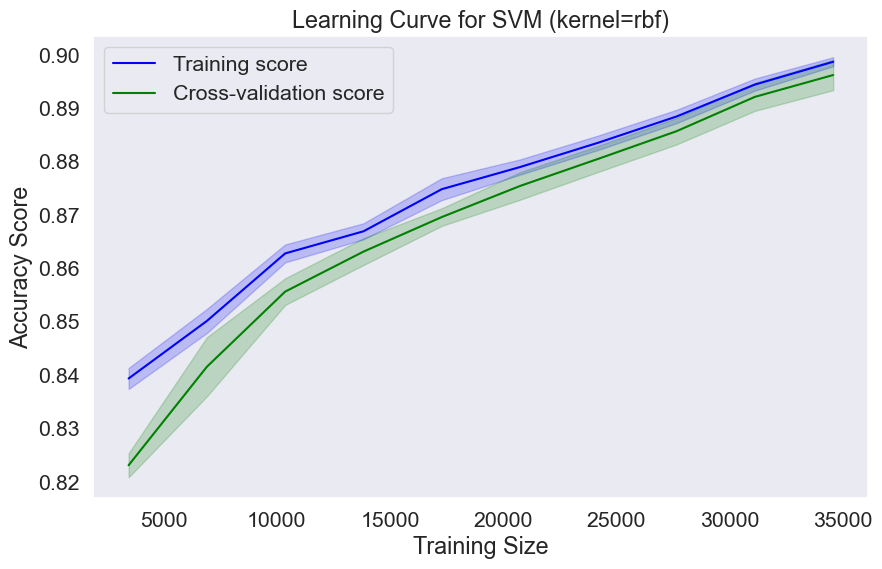

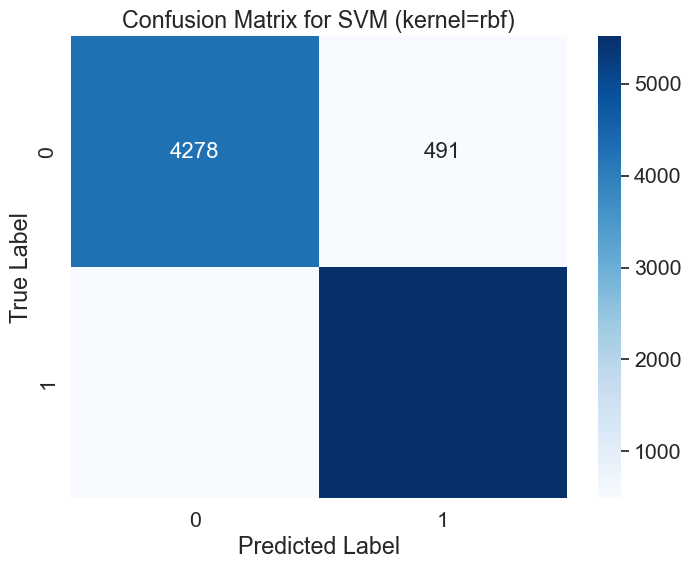

Kernel: sigmoid
Confusion Matrix:
[[2378 2391]
 [2510 3528]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.49      4769
           1       0.60      0.58      0.59      6038

    accuracy                           0.55     10807
   macro avg       0.54      0.54      0.54     10807
weighted avg       0.55      0.55      0.55     10807


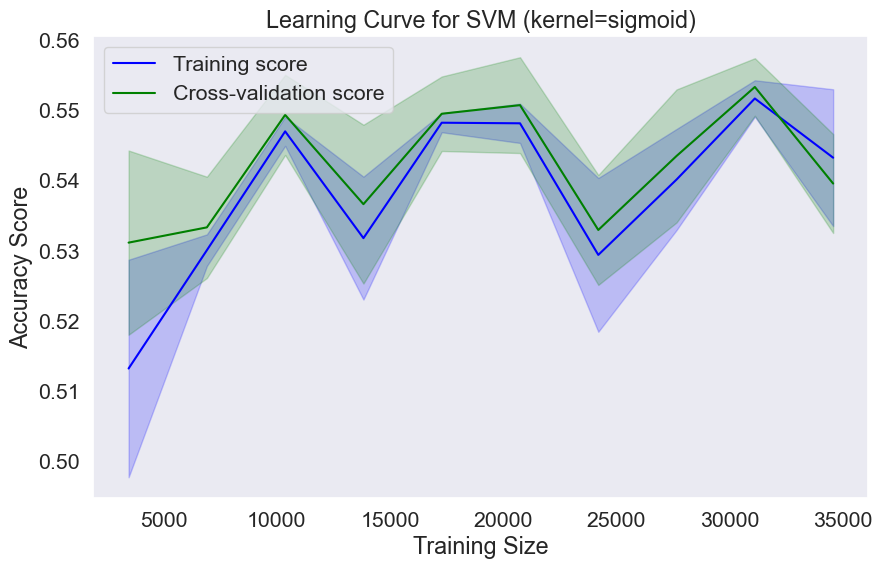

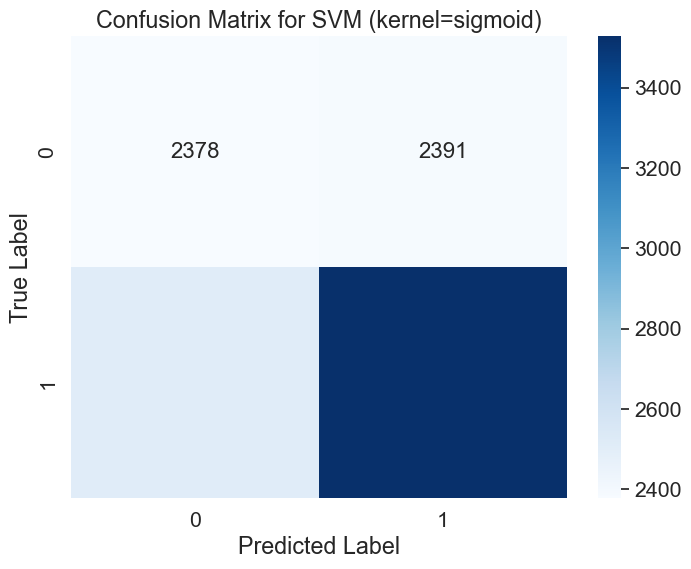

In [30]:
for result in svm_results:
    print(f"Kernel: {result['kernel']}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("\n")
    
    plt.figure(figsize=(10, 6))
    plt.plot(result['train_sizes'], result['train_mean'], label='Training score', color='blue')
    plt.fill_between(result['train_sizes'], result['train_mean'] - result['train_std'], result['train_mean'] + result['train_std'], color='blue', alpha=0.2)
    plt.plot(result['train_sizes'], result['validation_mean'], label='Cross-validation score', color='green')
    plt.fill_between(result['train_sizes'], result['validation_mean'] - result['validation_std'], result['validation_mean'] + result['validation_std'], color='green', alpha=0.2)

    plt.title(f'Learning Curve for SVM (kernel={result["kernel"]})')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title(f'Confusion Matrix for SVM (kernel={result["kernel"]})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [37]:
models = {
    'SVM_linear': SVC(kernel='linear'),
    'SVM_poly': SVC(kernel='poly'),
    'SVM_rbf': SVC(kernel='rbf'),
    'SVM_sigmoid': SVC(kernel='sigmoid'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Neural_Network': MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=1000)
}

# Train each model and measure the training time
for name, model in models.items():
    start_time = time.time()
    model.fit(cX_train, cy_train)
    end_time = time.time()
    
    training_time = end_time - start_time
    
    y_pred = model.predict(cX_test)
    
    print(f"{name} training time: {training_time:.4f} seconds")

SVM_linear training time: 36.9810 seconds
SVM_poly training time: 21.7796 seconds
SVM_rbf training time: 14.7323 seconds
SVM_sigmoid training time: 27.0546 seconds
KNN training time: 0.0262 seconds
Neural_Network training time: 20.4892 seconds
